In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
nltk.download('punkt_tab')
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/zemberek_lem_dataset.csv')

# Download necessary NLTK resources
nltk.download('punkt')

# Tokenize the "Stanza Lemmas" column
tokenized_texts = df['Stanza Lemmas'].apply(lambda x: word_tokenize(x.lower()))

# Create and train the Word2Vec model
model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec_model.model")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
1

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a656b900>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.1976 - loss: 1.8988 - val_accuracy: 0.5991 - val_loss: 1.0572
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.7158 - loss: 0.8989 - val_accuracy: 0.8073 - val_loss: 0.6197
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.8843 - loss: 0.4079 - val_accuracy: 0.8304 - val_loss: 0.5222
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9534 - loss: 0.2015 - val_accuracy: 0.8524 - val_loss: 0.5596
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.9592 - loss: 0.1382 - val_accuracy: 0.8491 - val_loss: 0.5717
Training CNN + LSTM (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
CNN + LSTM (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       148
           1       0.72      0.84      0.78       127
           2       0.82      0.88      0.85       111
          

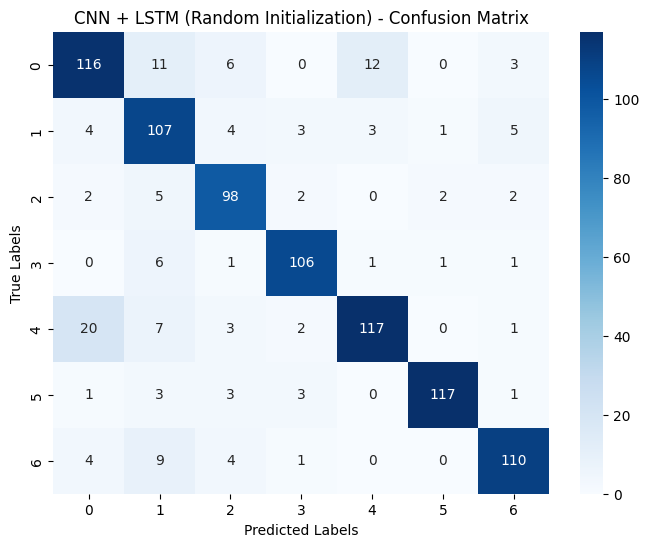

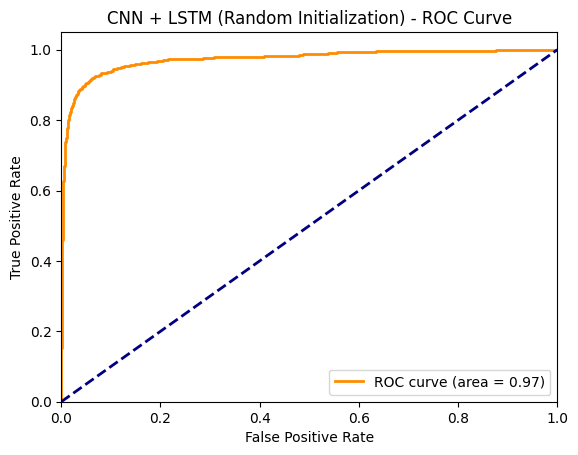

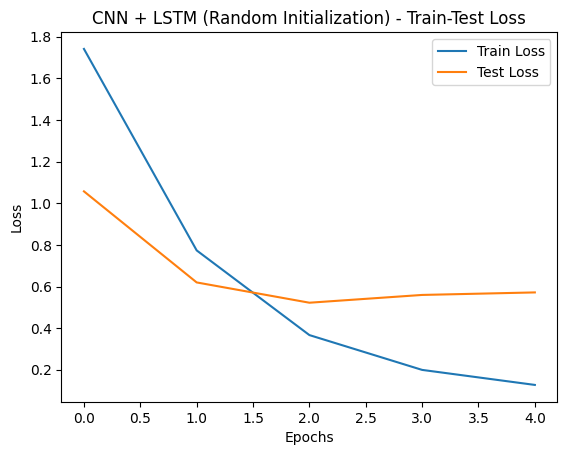

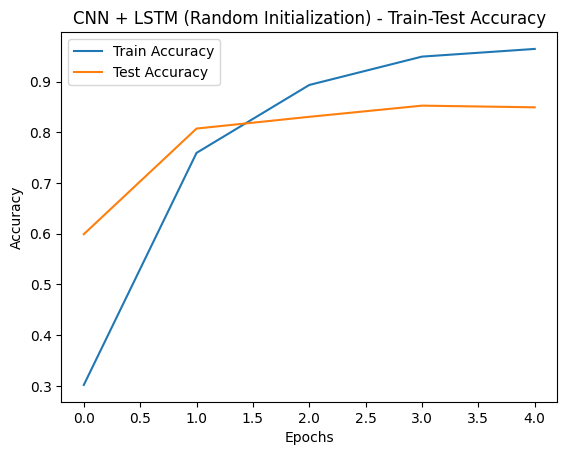

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.3733 - loss: 1.6320 - val_accuracy: 0.6410 - val_loss: 1.0376
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.6163 - loss: 1.0468 - val_accuracy: 0.6883 - val_loss: 0.8959
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.7020 - loss: 0.8651 - val_accuracy: 0.7048 - val_loss: 0.8652
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7674 - loss: 0.7113 - val_accuracy: 0.7687 - val_loss: 0.6894
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.7931 - loss: 0.6059 - val_accuracy: 0.7676 - val_loss: 0.6873
Training CNN + LSTM (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
CNN + LSTM (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.75       148
           1       0.52      0.85      0.64       127
           2       0.78      0.83      0.80       111
           3       

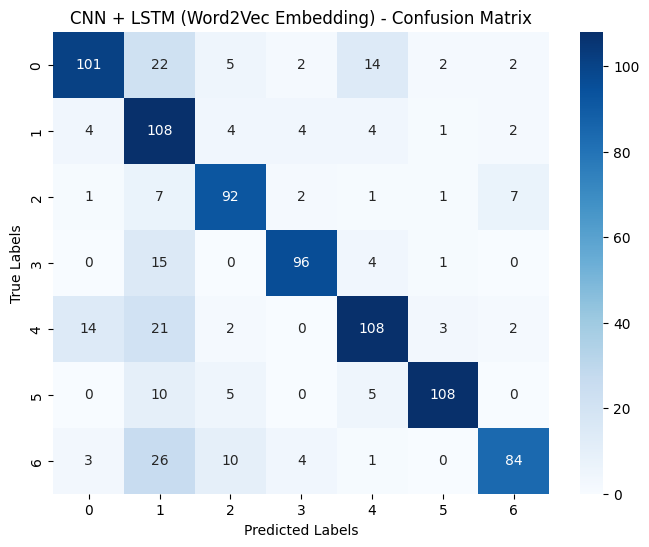

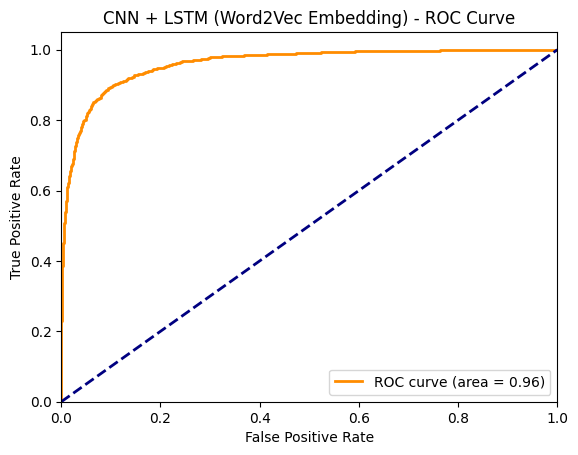

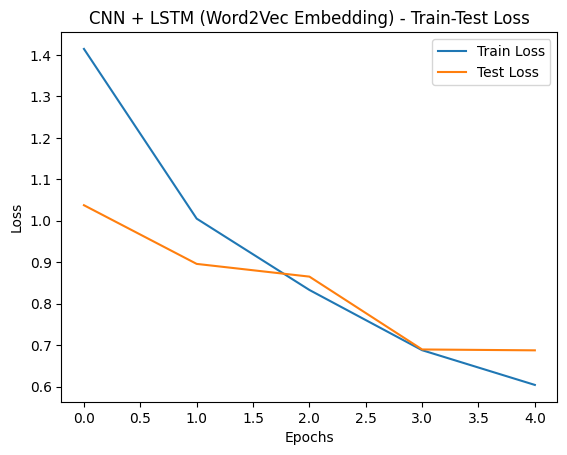

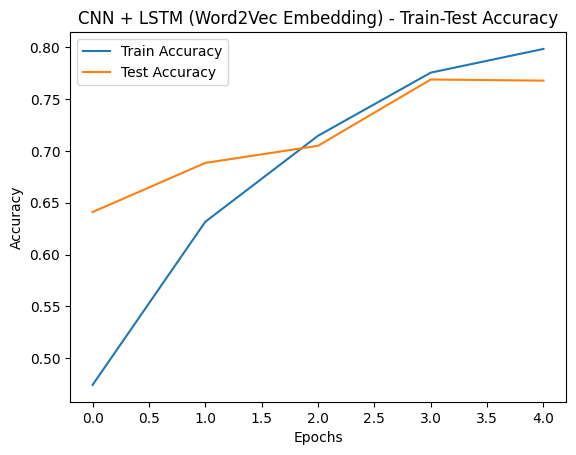

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_cnn_lstm_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_cnn_lstm_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_cnn_lstm_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "CNN + LSTM (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_lstm_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "CNN + LSTM (Word2Vec Embedding)")


In [ ]:
2

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7deb4446f580>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.2059 - loss: 1.8826 - val_accuracy: 0.5815 - val_loss: 1.1417
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 149ms/step - accuracy: 0.7141 - loss: 0.8744 - val_accuracy: 0.8205 - val_loss: 0.5687
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.9055 - loss: 0.3172 - val_accuracy: 0.8403 - val_loss: 0.5162
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.9541 - loss: 0.1738 - val_accuracy: 0.8733 - val_loss: 0.4970
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9854 - loss: 0.0594 - val_accuracy: 0.8711 - val_loss: 0.5038
Training CNN + BiLSTM (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
CNN + BiLSTM (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       148
           1       0.77      0.80      0.78       127
           2       0.87      0.88      0.88       111
  

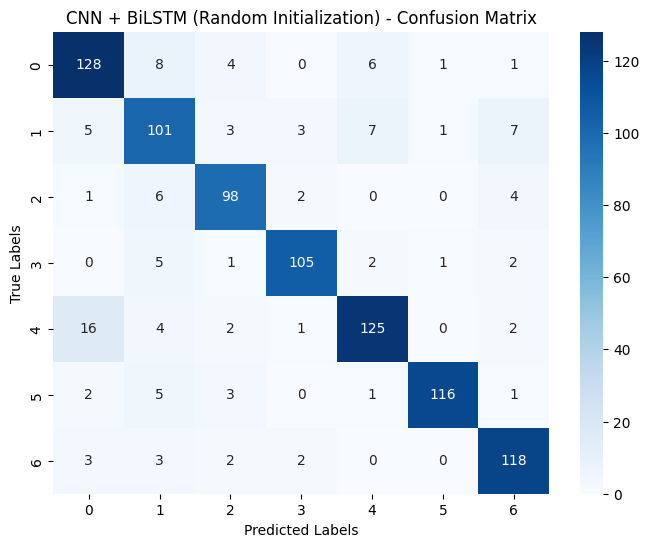

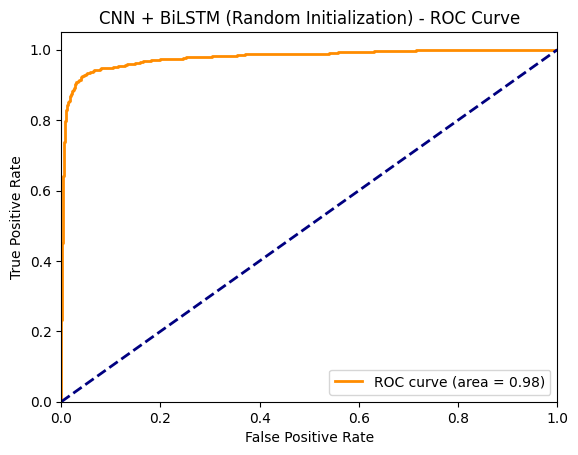

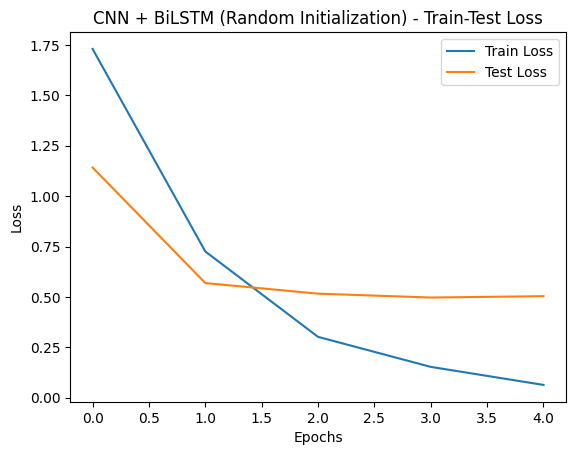

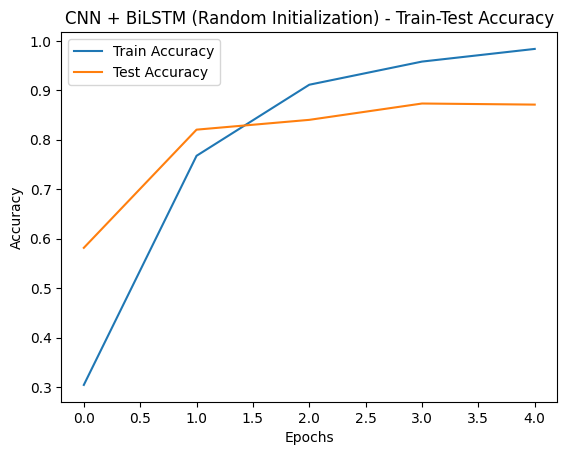

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Model: Random Initialization
def create_cnn_bilstm_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM kullanımı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Modeli oluşturma ve eğitme
model_random = create_cnn_bilstm_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "CNN + BiLSTM (Random Initialization)")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 297ms/step - accuracy: 0.3881 - loss: 1.6071 - val_accuracy: 0.6784 - val_loss: 0.9289
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.6931 - loss: 0.8921 - val_accuracy: 0.7379 - val_loss: 0.7872
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.7450 - loss: 0.7465 - val_accuracy: 0.7533 - val_loss: 0.7251
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.7829 - loss: 0.6446 - val_accuracy: 0.7742 - val_loss: 0.6884
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.8337 - loss: 0.5096 - val_accuracy: 0.8095 - val_loss: 0.6373
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.8672 - loss: 0.4160 - val_accuracy: 0.8062 - val_loss: 0.6064
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.8810 - loss: 0.3580 - val_accuracy: 0.8139 - val_loss: 0.5835
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.9139 - loss: 0.2779 - val_accuracy: 0.8172

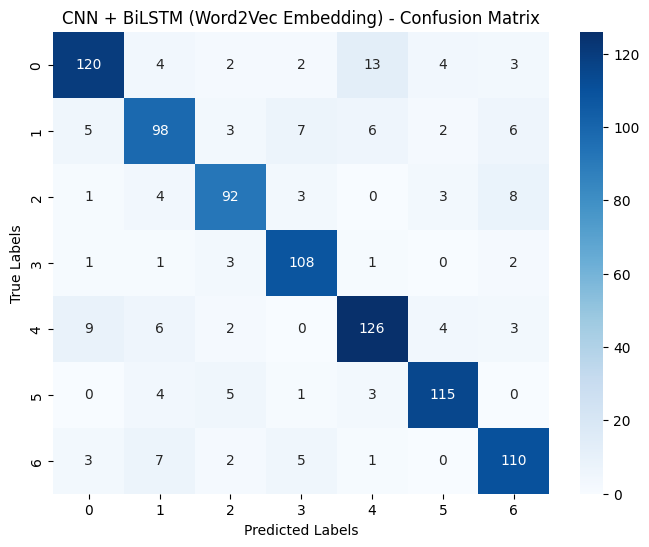

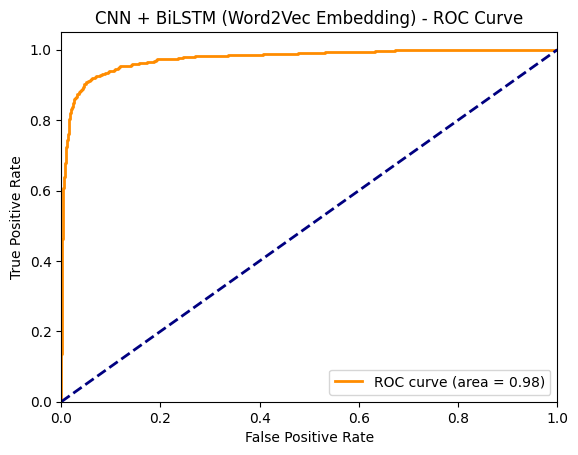

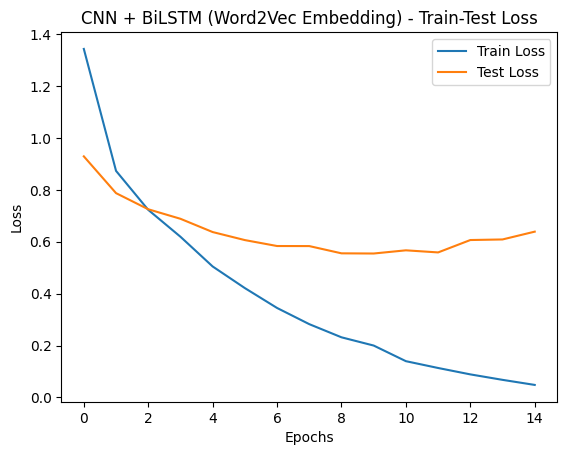

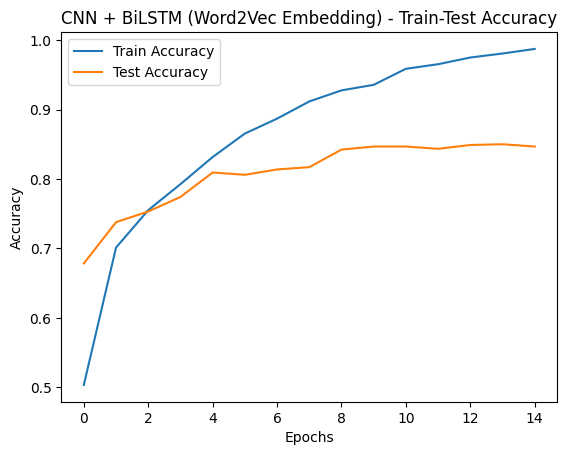

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Erken durdurma callback fonksiyonu
early_stopping = EarlyStopping(monitor='val_loss',  # Validation loss'ı izle
                               patience=5,          # 3 epoch boyunca iyileşme olmazsa durdur
                               restore_best_weights=True)  # En iyi ağırlıkları geri yükle

# Model 2: Word2Vec Embedding
def create_cnn_bilstm_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM kullanımı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_bilstm_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=20, batch_size=64,
                                      validation_data=(X_test_pad, y_test_cat),
                                      callbacks=[early_stopping])  # Early stopping eklenmiş
evaluate_model(model_word2vec, history_word2vec, "CNN + BiLSTM (Word2Vec Embedding)")


In [ ]:
3

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a27e7c80>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.1940 - loss: 1.9247 - val_accuracy: 0.5617 - val_loss: 1.5983
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.6443 - loss: 1.2521 - val_accuracy: 0.6696 - val_loss: 1.2571
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.8171 - loss: 0.7955 - val_accuracy: 0.7104 - val_loss: 1.0806
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.9197 - loss: 0.4131 - val_accuracy: 0.7203 - val_loss: 0.9572
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.9411 - loss: 0.3728 - val_accuracy: 0.7489 - val_loss: 0.9172
Training CNN + GRU (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
CNN + GRU (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       148
           1       0.70      0.64      0.67       127
           2       0.72      0.76      0.74       111
           

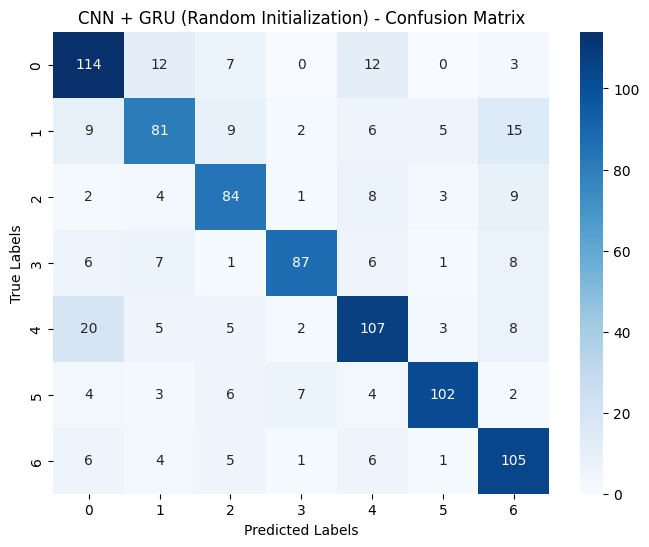

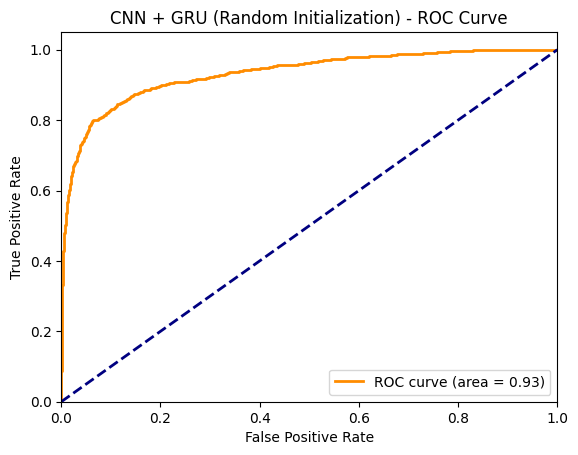

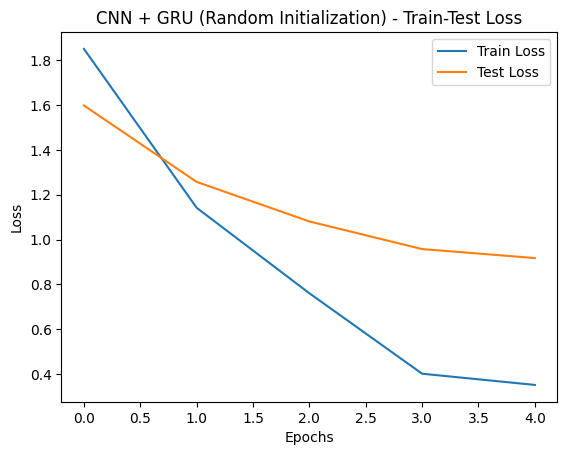

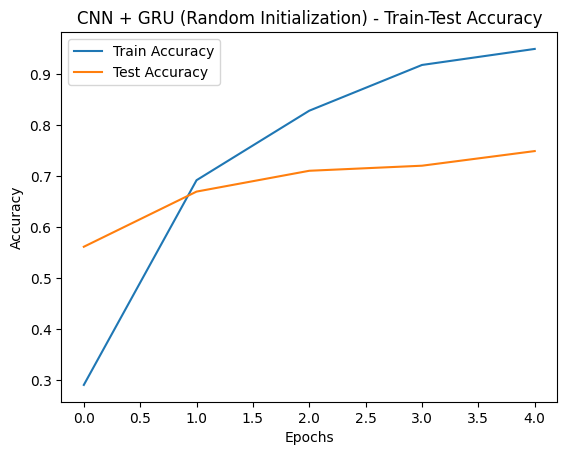

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.1662 - loss: 2.5828 - val_accuracy: 0.2885 - val_loss: 1.7906
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.3267 - loss: 1.7276 - val_accuracy: 0.3778 - val_loss: 1.6423
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.4297 - loss: 1.5959 - val_accuracy: 0.4405 - val_loss: 1.5516
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.4960 - loss: 1.4429 - val_accuracy: 0.4956 - val_loss: 1.4500
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.4910 - loss: 1.5567 - val_accuracy: 0.4769 - val_loss: 1.4874
Training CNN + GRU (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
CNN + GRU (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.34      0.37       148
           1       0.37      0.47      0.41       127
           2       0.53      0.55      0.54       111
           3   

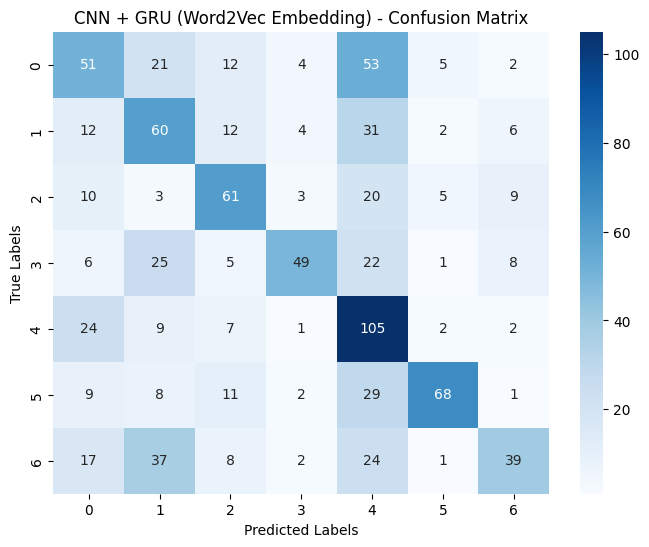

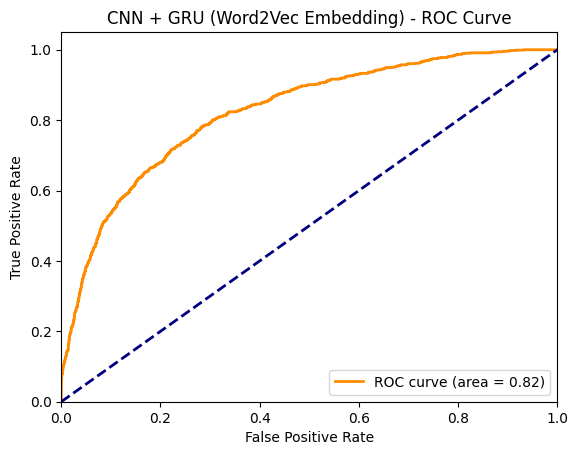

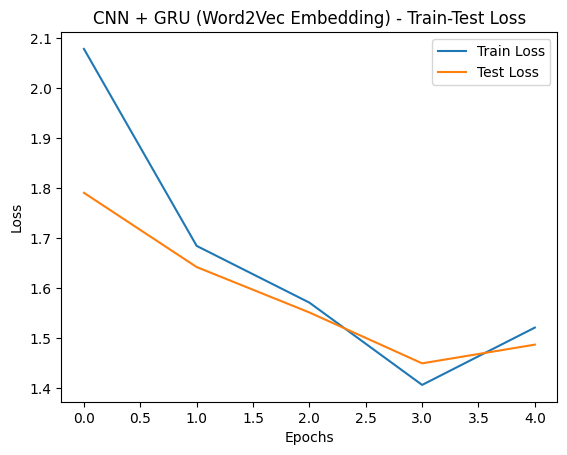

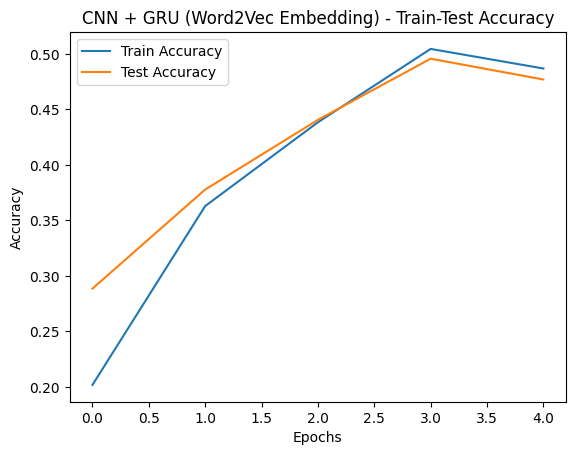

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_cnn_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_cnn_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_cnn_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "CNN + GRU (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "CNN + GRU (Word2Vec Embedding)")


In [ ]:
# CNN + GRU (Word2Vec Embedding) 0.47 ---> 0.68

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - accuracy: 0.1653 - loss: 2.7515 - val_accuracy: 0.2786 - val_loss: 1.8542
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.2718 - loss: 1.8342 - val_accuracy: 0.3667 - val_loss: 1.7288
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.3704 - loss: 1.7527 - val_accuracy: 0.4328 - val_loss: 1.6637
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.4278 - loss: 1.5946 - val_accuracy: 0.4119 - val_loss: 1.6187
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.4502 - loss: 1.5220 - val_accuracy: 0.4725 - val_loss: 1.5664
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.4740 - loss: 1.4562 - val_accuracy: 0.5066 - val_loss: 1.4736
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.4958 - loss: 1.4776 - val_accuracy: 0.5055 - val_loss: 1.4790
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.5547 - loss: 1.2749 - val_accuracy: 0.5209 -

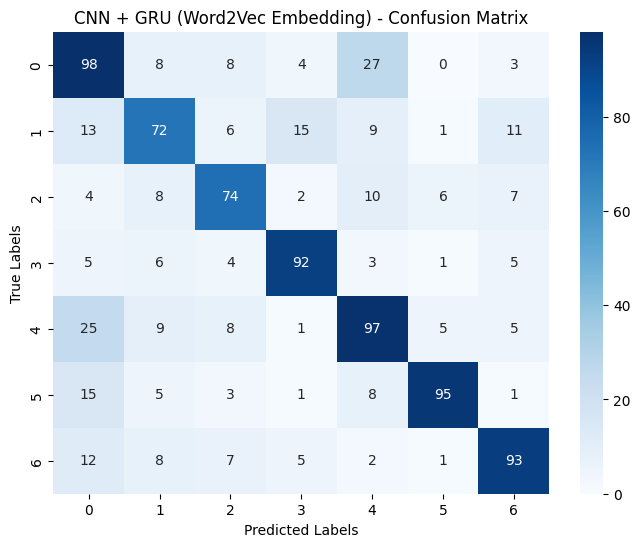

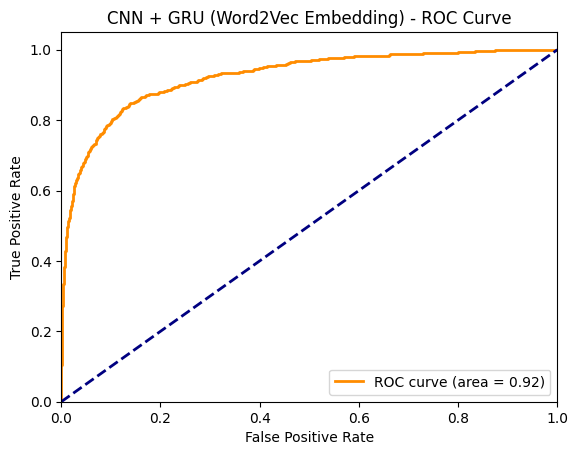

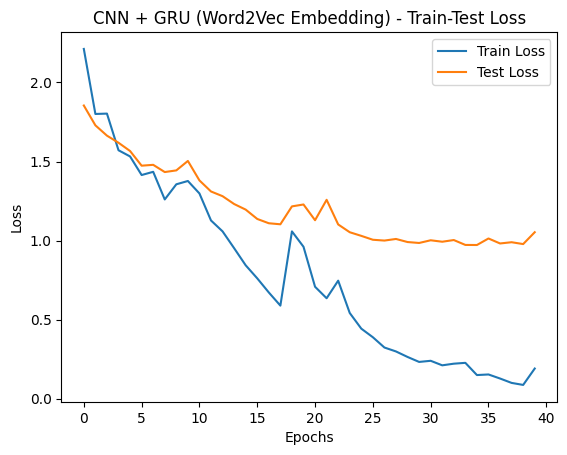

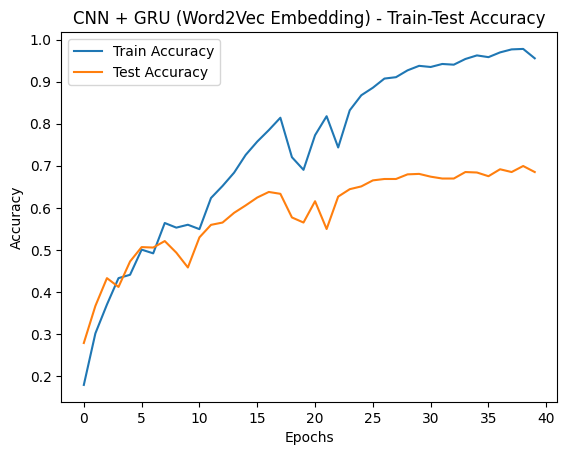

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Erken Durdurma callback fonksiyonu
early_stopping = EarlyStopping(monitor='val_loss',  # Validation loss'ı izle
                               patience=5,          # 3 epoch boyunca iyileşme olmazsa durdur
                               restore_best_weights=True)  # En iyi ağırlıkları geri yükle

# Model 2: Word2Vec Embedding
def create_cnn_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=50, batch_size=64, validation_data=(X_test_pad, y_test_cat), callbacks=[early_stopping])
evaluate_model(model_word2vec, history_word2vec, "CNN + GRU (Word2Vec Embedding)")


In [ ]:
4

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a69d3d320c0>


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 496ms/step - accuracy: 0.2150 - loss: 1.8848 - val_accuracy: 0.4482 - val_loss: 1.3207
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 493ms/step - accuracy: 0.5409 - loss: 1.1920 - val_accuracy: 0.7247 - val_loss: 0.9119
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 486ms/step - accuracy: 0.7579 - loss: 0.7074 - val_accuracy: 0.7544 - val_loss: 0.7779
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 487ms/step - accuracy: 0.8721 - loss: 0.4417 - val_accuracy: 0.7830 - val_loss: 0.7001
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 488ms/step - accuracy: 0.9095 - loss: 0.2850 - val_accuracy: 0.8150 - val_loss: 0.6588
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 482ms/step - accuracy: 0.9480 - loss: 0.1847 - val_accuracy: 0.8095 - val_loss: 0.7042
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 485ms/step - accuracy: 0.9712 - loss: 0.1075 - val_accuracy: 0.8161 - val_loss: 0.6978
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 480ms/step - accuracy: 0.9776 - loss: 0.0848 - val_accu

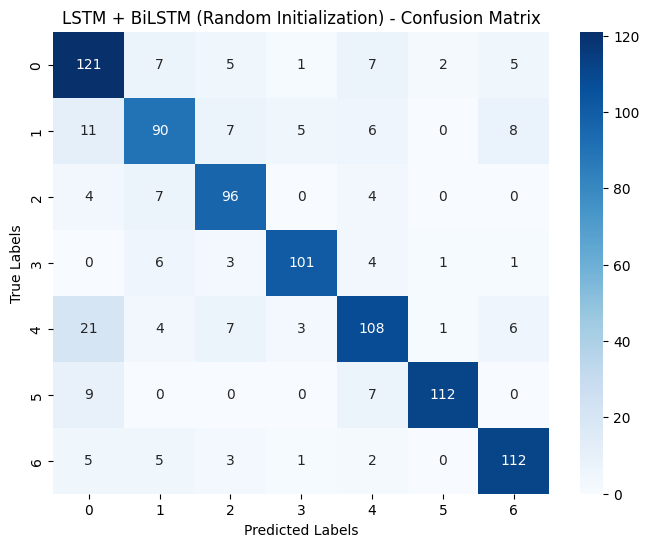

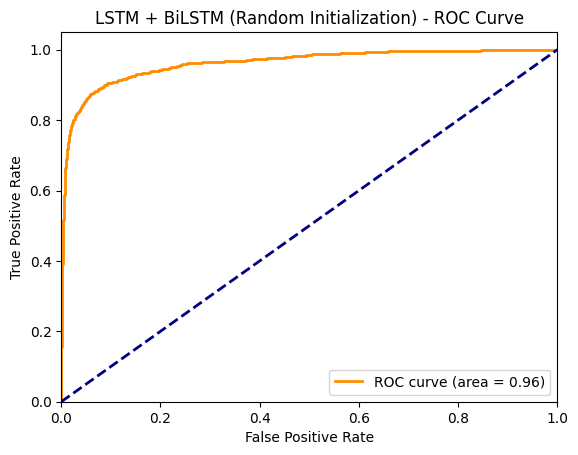

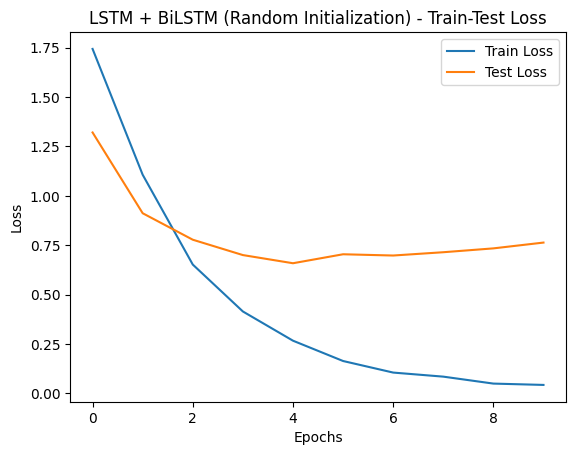

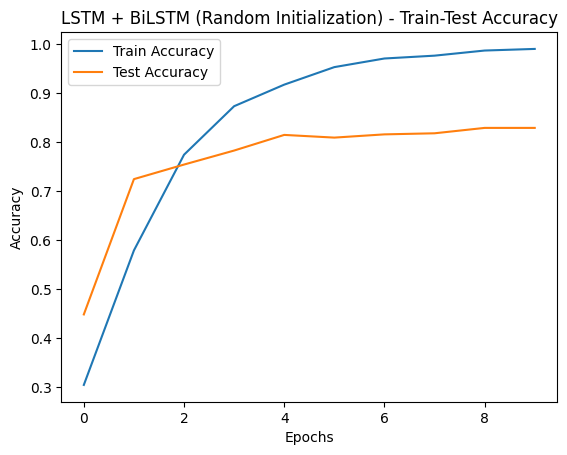

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Model: Random Initialization
def create_lstm_bilstm_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM kullanımı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# EarlyStopping callback'ini tanımlayalım
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli oluşturma ve eğitme
model_random = create_lstm_bilstm_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=15, batch_size=64, validation_data=(X_test_pad, y_test_cat), callbacks=[early_stopping])
evaluate_model(model_random, history_random, "LSTM + BiLSTM (Random Initialization)")


Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a6952505ec0>
Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 497ms/step - accuracy: 0.3286 - loss: 1.7288 - val_accuracy: 0.5760 - val_loss: 1.1468
Epoch 2/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 481ms/step - accuracy: 0.5828 - loss: 1.1530 - val_accuracy: 0.6949 - val_loss: 0.9367
Epoch 3/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 492ms/step - accuracy: 0.6761 - loss: 0.9359 - val_accuracy: 0.7368 - val_loss: 0.7841
Epoch 4/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 483ms/step - accuracy: 0.7331 - loss: 0.7915 - val_accuracy: 0.7654 - val_loss: 0.7150
Epoch 5/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 486ms/step - accuracy: 0.7714 - loss: 0.6805 - val_accuracy: 0.7852 - val_loss: 0.7079
Epoch 6/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 486ms/step - accuracy: 0.7966 - loss: 0.6044 - val_accuracy: 0.7919 - val_loss: 0.6666
Epoch 7/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 490ms/step - accuracy: 0.8362 - loss: 0.5334 - val_accuracy: 0.8139 - val_loss: 0.6326
Epoch 8/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 482ms/step - accuracy: 0.8426 - loss: 0.5064 - val_accuracy: 0.8139 - val

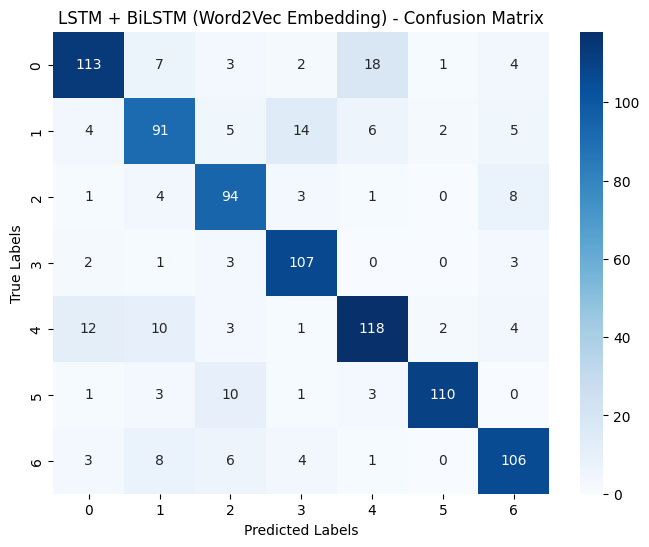

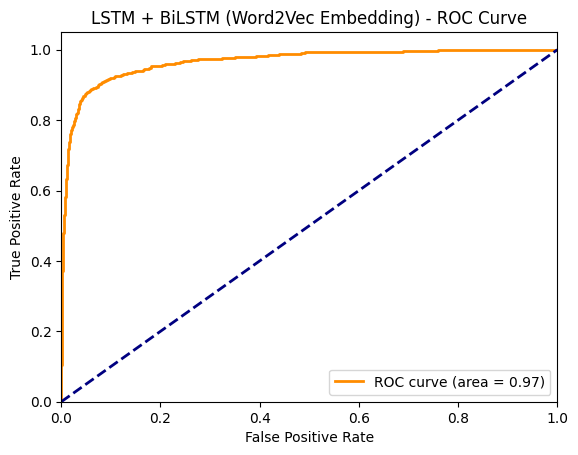

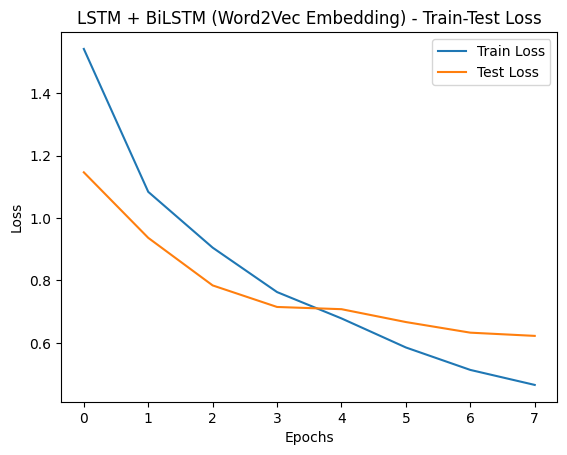

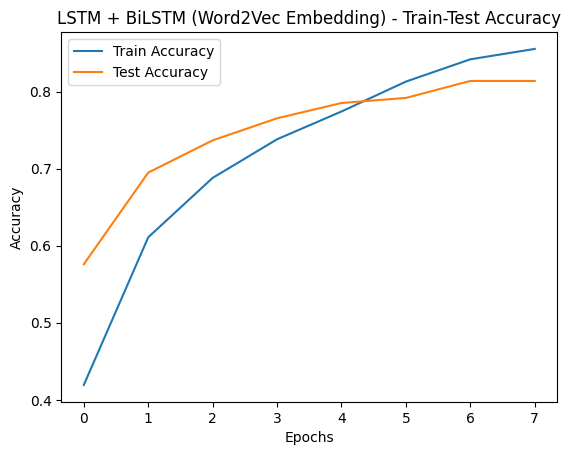

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model: Word2Vec Embedding
def create_lstm_bilstm_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM kullanımı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# EarlyStopping callback'ini tanımlayalım
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli oluşturma ve eğitme
model_word2vec = create_lstm_bilstm_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=8, batch_size=64, validation_data=(X_test_pad, y_test_cat), callbacks=[early_stopping])
evaluate_model(model_word2vec, history_word2vec, "LSTM + BiLSTM (Word2Vec Embedding)")


In [ ]:
5

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7deb8c783d40>
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 419ms/step - accuracy: 0.2176 - loss: 2.0862 - val_accuracy: 0.3337 - val_loss: 1.7594
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 48s 544ms/step - accuracy: 0.4440 - loss: 2.3871 - val_accuracy: 0.5209 - val_loss: 1.7414
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 525ms/step - accuracy: 0.5893 - loss: 1.7574 - val_accuracy: 0.5341 - val_loss: 1.6449
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 483ms/step - accuracy: 0.5810 - loss: 1.4158 - val_accuracy: 0.5804 - val_loss: 1.5427
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 50s 648ms/step - accuracy: 0.6622 - loss: 1.2376 - val_accuracy: 0.6189 - val_loss: 1.4859
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 441ms/step - accuracy: 0.7469 - loss: 1.1574 - val_accuracy: 0.6487 - val_loss: 1.3899
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 424ms/step - accuracy: 0.7719 - loss: 1.3116 - val_accuracy: 0.5903 - val_loss: 1.4308
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 433ms/step - accuracy: 0.7046 - loss: 1.1040 - val_accuracy: 0.599

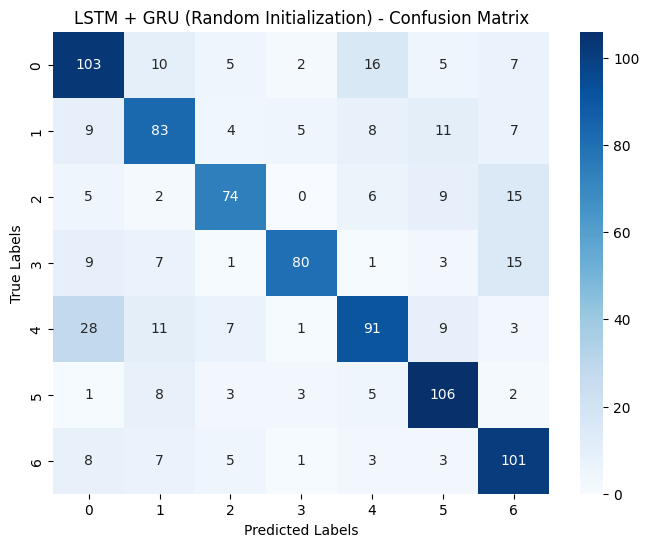

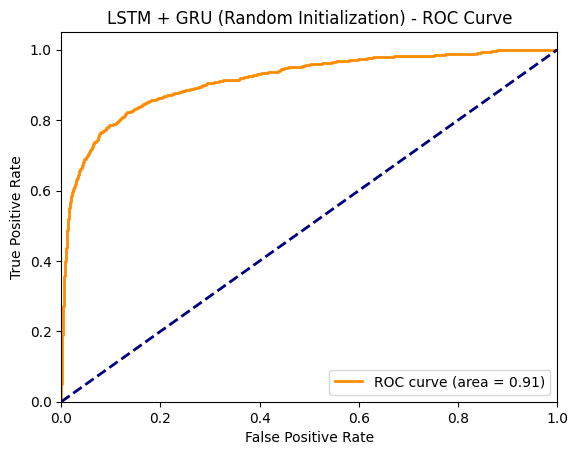

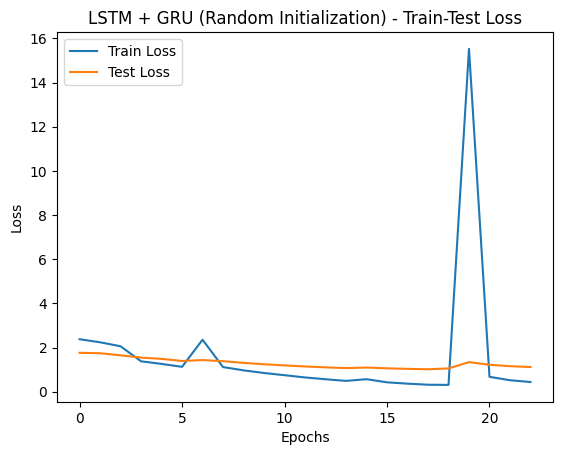

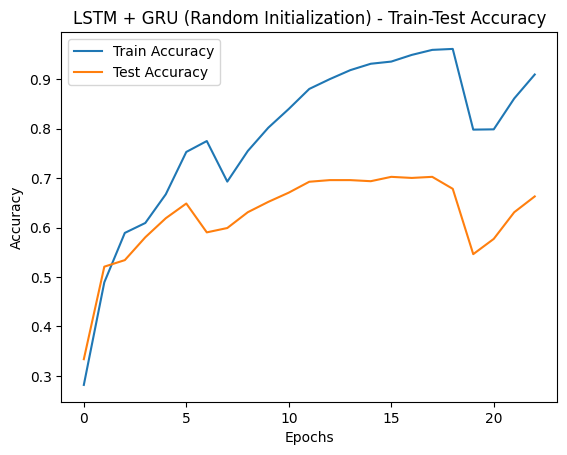

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Model: Random Initialization
def create_lstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               verbose=1)

# Modeli oluşturma ve eğitme
model_random = create_lstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=50, batch_size=64,
                                  validation_data=(X_test_pad, y_test_cat),
                                  callbacks=[early_stopping])  # Early stopping ekledik
evaluate_model(model_random, history_random, "LSTM + GRU (Random Initialization)")


Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7dec03afb1c0>
Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 427ms/step - accuracy: 0.2672 - loss: 3.9724 - val_accuracy: 0.4769 - val_loss: 1.6419
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 390ms/step - accuracy: 0.4457 - loss: 6.2330 - val_accuracy: 0.4207 - val_loss: 1.6605
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 420ms/step - accuracy: 0.3999 - loss: 1.6385 - val_accuracy: 0.4725 - val_loss: 1.6335
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 419ms/step - accuracy: 0.4329 - loss: 1.5654 - val_accuracy: 0.5044 - val_loss: 1.5783
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 418ms/step - accuracy: 0.4766 - loss: 1.5161 - val_accuracy: 0.5352 - val_loss: 1.5305
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 384ms/step - accuracy: 0.5260 - loss: 1.4278 - val_accuracy: 0.5463 - val_loss: 1.4843
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 416ms/step - accuracy: 0.5369 - loss: 1.3997 - val_accuracy: 0.5518 - val_loss: 1.4406
Epoch 8/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 417ms/step - accuracy: 0.5634 - loss: 1.3000 - val_accuracy: 0.565

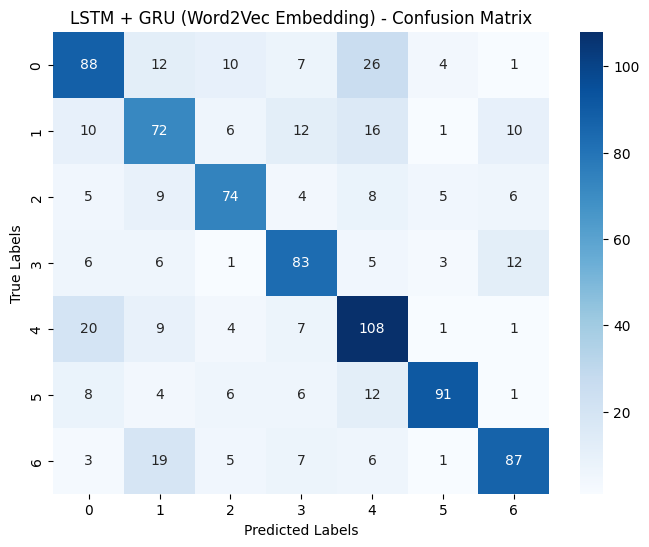

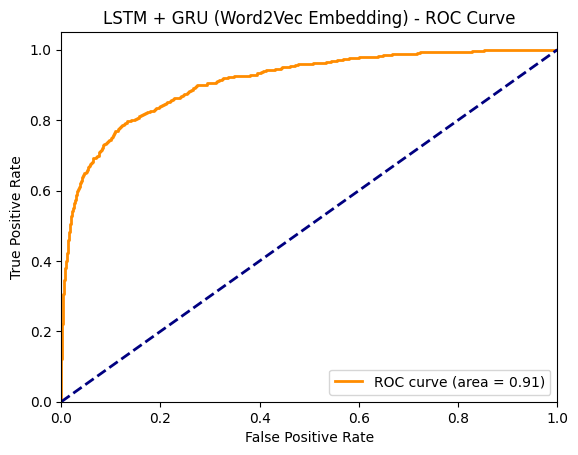

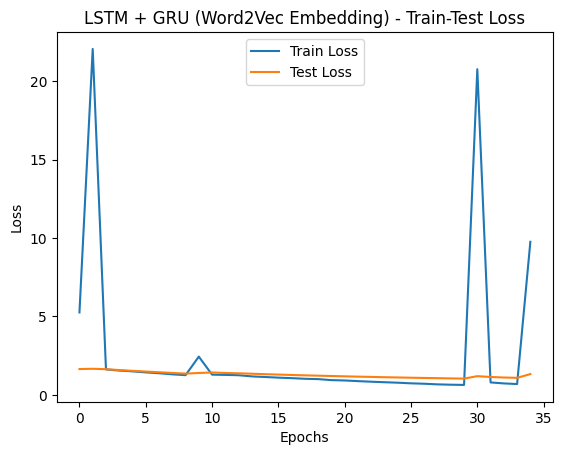

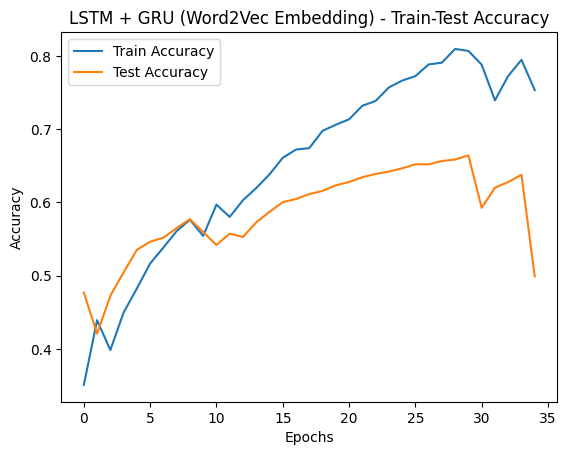

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model: Word2Vec Embedding
def create_lstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               verbose=1)

# Modeli oluşturma ve eğitme
model_word2vec = create_lstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=40, batch_size=64,
                                      validation_data=(X_test_pad, y_test_cat),
                                      callbacks=[early_stopping])  # Early stopping ekledik
evaluate_model(model_word2vec, history_word2vec, "LSTM + GRU (Word2Vec Embedding)")


In [ ]:
6

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a6950425480>
Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 44s 652ms/step - accuracy: 0.2065 - loss: 13.7672 - val_accuracy: 0.4339 - val_loss: 1.7348
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 37s 578ms/step - accuracy: 0.4530 - loss: 87.7889 - val_accuracy: 0.4637 - val_loss: 1.6600
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 35s 608ms/step - accuracy: 0.5549 - loss: 1.4517 - val_accuracy: 0.5771 - val_loss: 1.5446
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 38s 550ms/step - accuracy: 0.6844 - loss: 1.3508 - val_accuracy: 0.6244 - val_loss: 1.4621
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 552ms/step - accuracy: 0.7378 - loss: 1.2036 - val_accuracy: 0.6377 - val_loss: 1.3900
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 54s 793ms/step - accuracy: 0.7702 - loss: 2.0904 - val_accuracy: 0.6575 - val_loss: 1.3682
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 75s 677ms/step - accuracy: 0.8141 - loss: 2.0885 - val_accuracy: 0.6652 - val_loss: 1.3442
Epoch 8/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 680ms/step - accuracy: 0.8169 - loss: 0.9670 - val_accuracy: 0.6

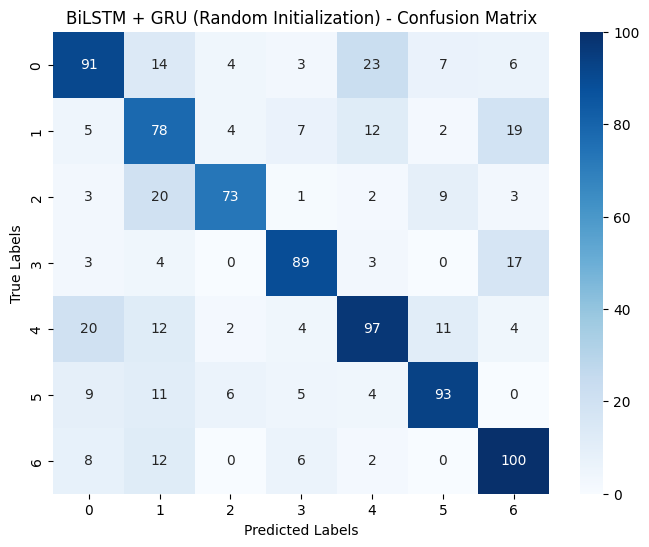

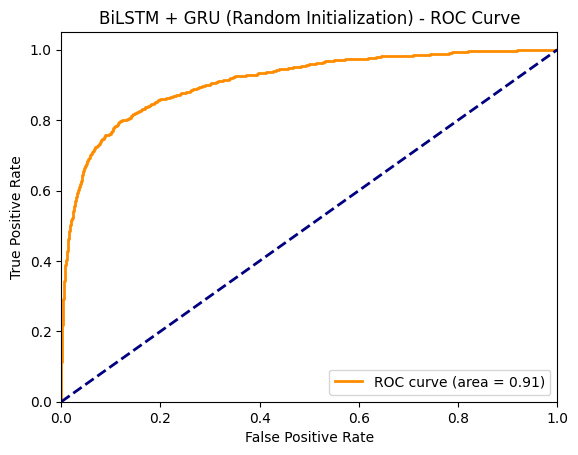

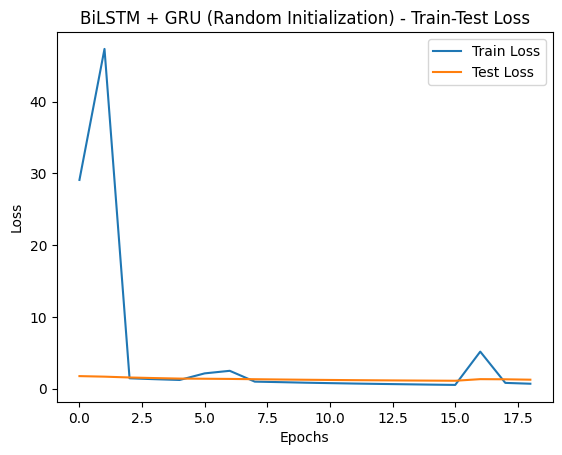

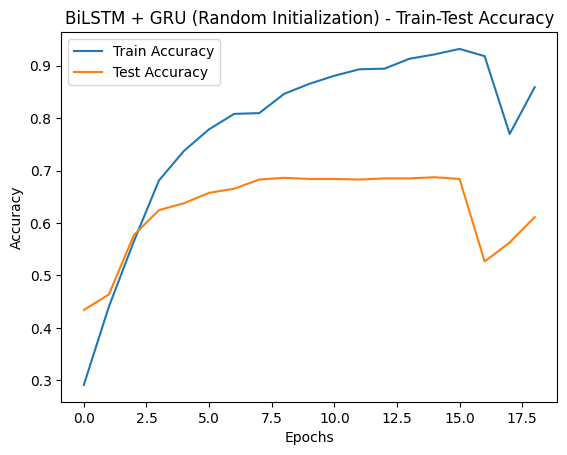

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Model 1: Random Initialization
def create_bilstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True,
                               verbose=1)

# Modeli eğitme ve test etme
model_random = create_bilstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=40, batch_size=64,
                                  validation_data=(X_test_pad, y_test_cat),
                                  callbacks=[early_stopping])  # Early stopping ekledik

# Modeli değerlendirme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1 sonuçlarını değerlendirelim
evaluate_model(model_random, history_random, "BiLSTM + GRU (Random Initialization)")


Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a69520cccc0>
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 587ms/step - accuracy: 0.2204 - loss: 45.2689 - val_accuracy: 0.3018 - val_loss: 1.8400
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 704ms/step - accuracy: 0.2886 - loss: 1.8131 - val_accuracy: 0.3976 - val_loss: 1.7945
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 721ms/step - accuracy: 0.3338 - loss: 1.7555 - val_accuracy: 0.4240 - val_loss: 1.7399
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 918ms/step - accuracy: 0.3919 - loss: 12.0771 - val_accuracy: 0.2291 - val_loss: 1.8651
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 568ms/step - accuracy: 0.2522 - loss: 3.1014 - val_accuracy: 0.3447 - val_loss: 1.8006
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 755ms/step - accuracy: 0.3239 - loss: 1.7655 - val_accuracy: 0.3756 - val_loss: 1.7704
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 70s 547ms/step - accuracy: 0.3407 - loss: 1.7106 - val_accuracy: 0.4086 - val_loss: 1.7493
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 565ms/step - accuracy: 0.3838 - loss: 1.6854 - val_accuracy: 0.4

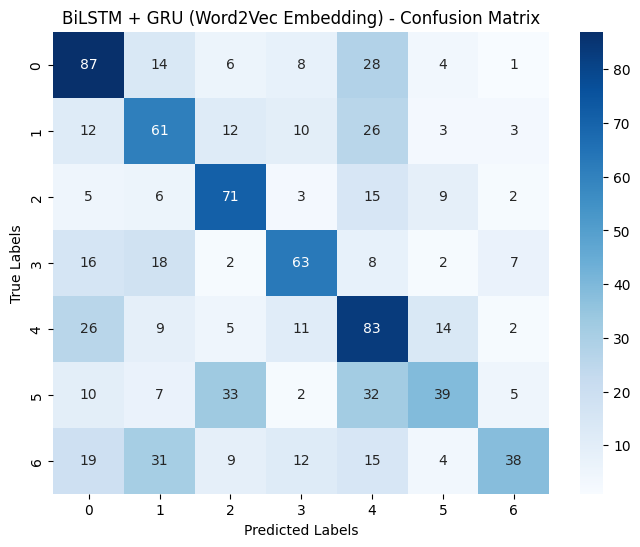

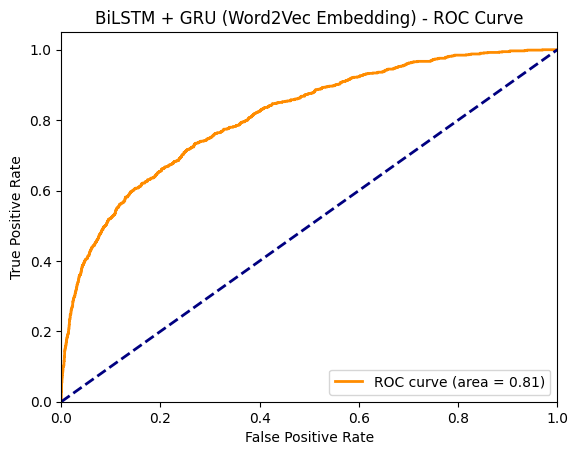

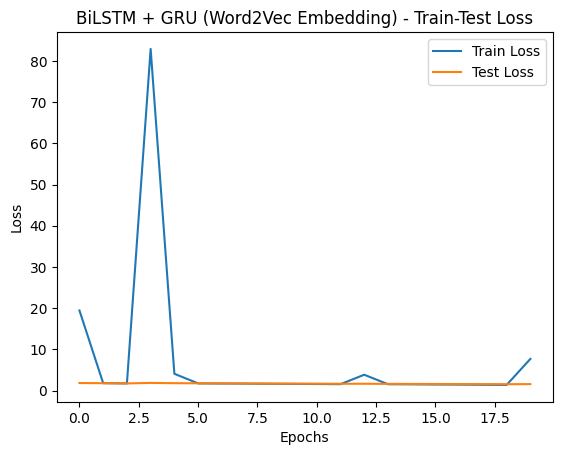

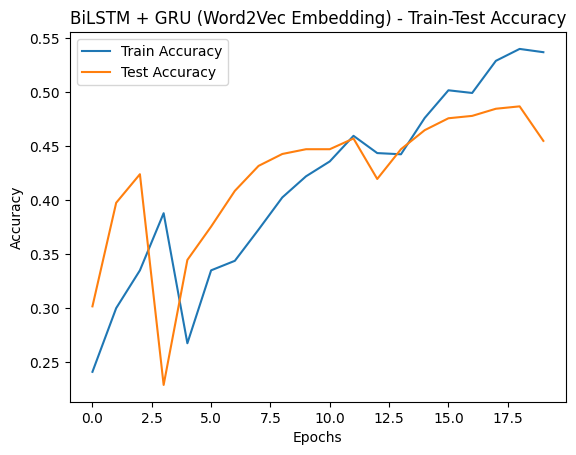

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 2: Word2Vec Embedding
def create_bilstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               verbose=1)

# Modeli eğitme ve test etme
model_word2vec = create_bilstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=20, batch_size=64,
                                      validation_data=(X_test_pad, y_test_cat),
                                      callbacks=[early_stopping])

# Modelin değerlendirilmesi
evaluate_model(model_word2vec, history_word2vec, "BiLSTM + GRU (Word2Vec Embedding)")


In [ ]:
7

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a69c4101380>
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.2004 - loss: 1.8780 - val_accuracy: 0.5705 - val_loss: 1.1714
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 245ms/step - accuracy: 0.6813 - loss: 0.9011 - val_accuracy: 0.8029 - val_loss: 0.6042
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 241ms/step - accuracy: 0.8904 - loss: 0.3693 - val_accuracy: 0.8425 - val_loss: 0.5326
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - accuracy: 0.9495 - loss: 0.1781 - val_accuracy: 0.8491 - val_loss: 0.5597
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.9701 - loss: 0.1126 - val_accuracy: 0.8348 - val_loss: 0.6171
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.9870 - loss: 0.0626 - val_accuracy: 0.8557 - val_loss: 0.6204
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - accuracy: 0.9832 - loss: 0.0626 - val_accuracy: 0.8513 - val_loss: 0.6069
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 255ms/step - accuracy: 0.9894 - loss: 0.0433 - val_accuracy: 0.851

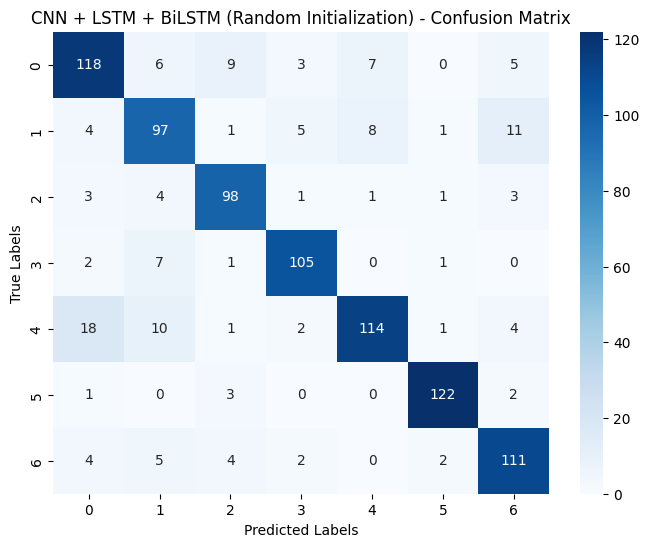

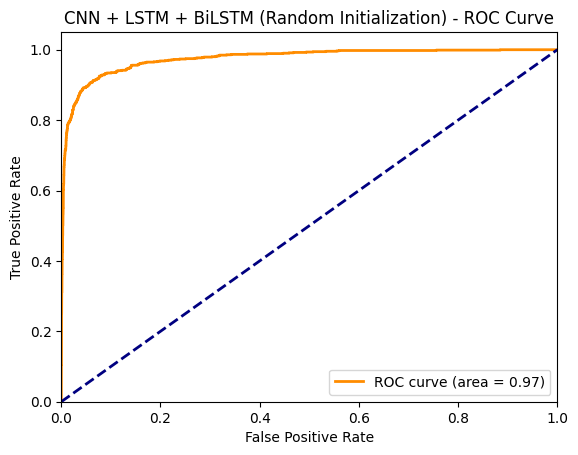

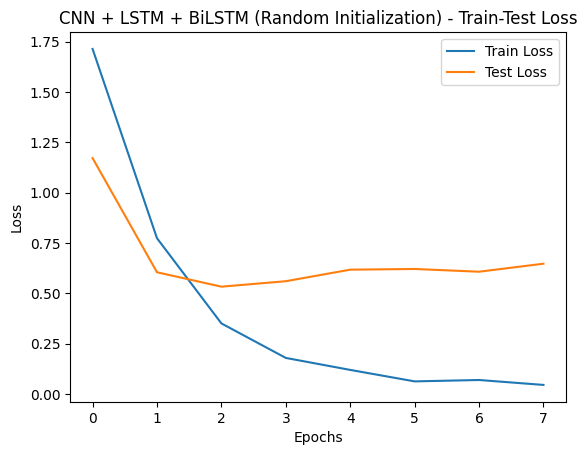

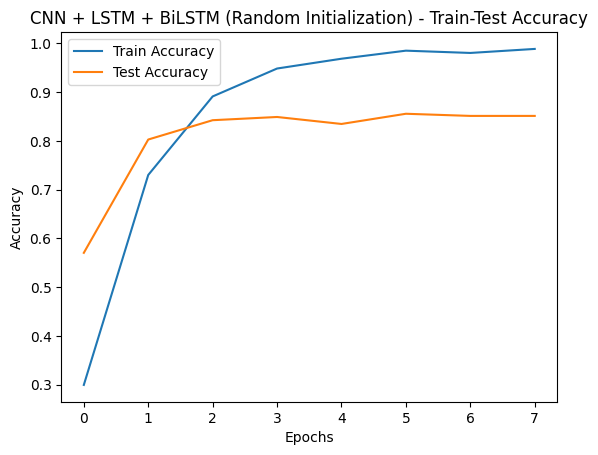

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Model 1: Random Initialization
def create_cnn_lstm_bilstm_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback'ini tanımlayalım
early_stopping = EarlyStopping(monitor='val_loss',  # validation loss'u izle
                               patience=5,  # 3 epoch boyunca gelişim olmadığında durdur
                               restore_best_weights=True,  # en iyi ağırlıkları geri yükle
                               verbose=1)

# Modeli eğitme ve test etme
model_random = create_cnn_lstm_bilstm_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=20, batch_size=64,
                                  validation_data=(X_test_pad, y_test_cat),
                                  callbacks=[early_stopping])  # Early stopping'i ekledik

# Modeli değerlendirme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1 sonuçlarını değerlendirelim
evaluate_model(model_random, history_random, "CNN + LSTM + BiLSTM (Random Initialization)")


Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a695143f180>
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 258ms/step - accuracy: 0.3392 - loss: 1.6922 - val_accuracy: 0.6531 - val_loss: 1.0248
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - accuracy: 0.6505 - loss: 0.9894 - val_accuracy: 0.6938 - val_loss: 0.9188
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - accuracy: 0.7205 - loss: 0.8185 - val_accuracy: 0.7533 - val_loss: 0.7568
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.7941 - loss: 0.6368 - val_accuracy: 0.7764 - val_loss: 0.7029
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.8106 - loss: 0.5684 - val_accuracy: 0.7698 - val_loss: 0.7123
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 255ms/step - accuracy: 0.8419 - loss: 0.4847 - val_accuracy: 0.8040 - val_loss: 0.6589
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 311ms/step - accuracy: 0.8708 - loss: 0.4013 - val_accuracy: 0.8205 - val_loss: 0.6365
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 388ms/step - accuracy: 0.8962 - loss: 0.3329 - val_accuracy: 0.820

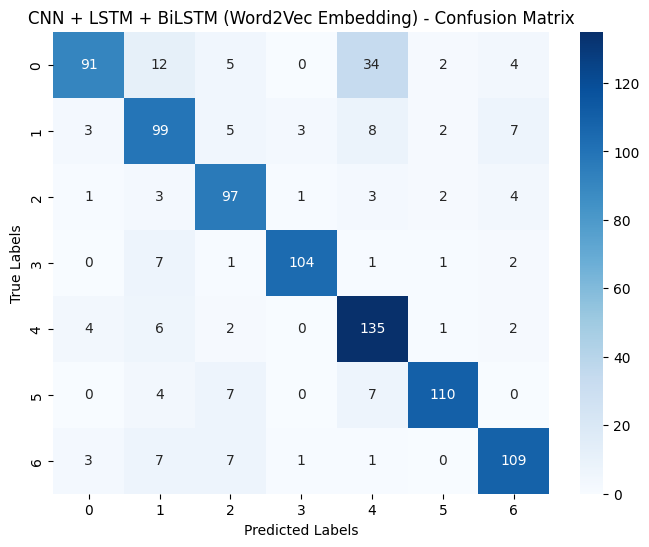

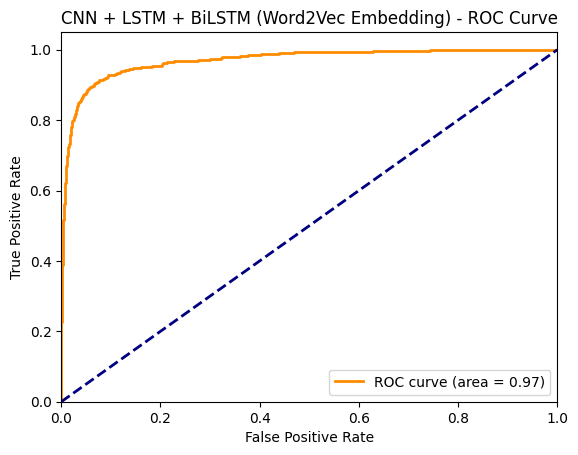

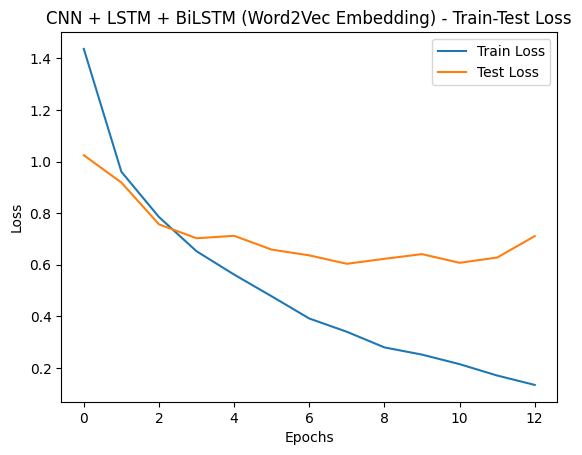

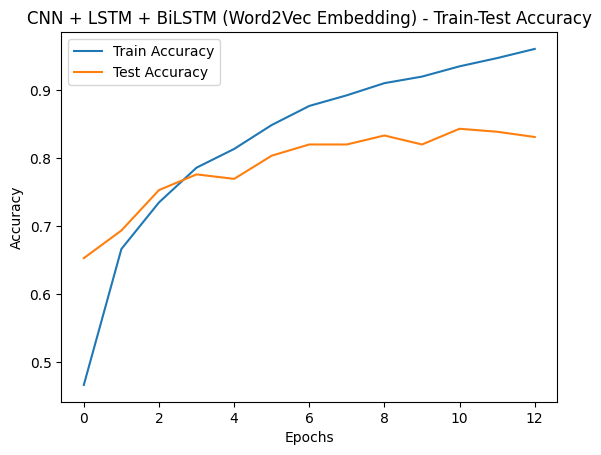

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 2: Word2Vec Embedding
def create_cnn_lstm_bilstm_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback'ini tanımlayalım
early_stopping = EarlyStopping(monitor='val_loss',  # validation loss'u izle
                               patience=5,  # 3 epoch boyunca gelişim olmadığında durdur
                               restore_best_weights=True,  # en iyi ağırlıkları geri yükle
                               verbose=1)

# Modeli eğitme ve test etme
model_word2vec = create_cnn_lstm_bilstm_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=20, batch_size=64,
                                      validation_data=(X_test_pad, y_test_cat),
                                      callbacks=[early_stopping])  # Early stopping'i ekledik

# Modeli değerlendirme fonksiyonu
evaluate_model(model_word2vec, history_word2vec, "CNN + LSTM + BiLSTM (Word2Vec Embedding)")


In [ ]:
8

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a694b5b55c0>
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 206ms/step - accuracy: 0.2140 - loss: 1.8616 - val_accuracy: 0.5474 - val_loss: 1.3029
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.6499 - loss: 1.1023 - val_accuracy: 0.7181 - val_loss: 1.0568
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 207ms/step - accuracy: 0.8201 - loss: 0.7648 - val_accuracy: 0.8073 - val_loss: 0.7735
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - accuracy: 0.9119 - loss: 0.4553 - val_accuracy: 0.8183 - val_loss: 0.6686
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.9397 - loss: 0.3890 - val_accuracy: 0.8293 - val_loss: 0.5863
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.9665 - loss: 0.1495 - val_accuracy: 0.8403 - val_loss: 0.5384
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.9549 - loss: 0.2100 - val_accuracy: 0.8150 - val_loss: 0.6311
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - accuracy: 0.9540 - loss: 0.2029 - val_accuracy: 0.818

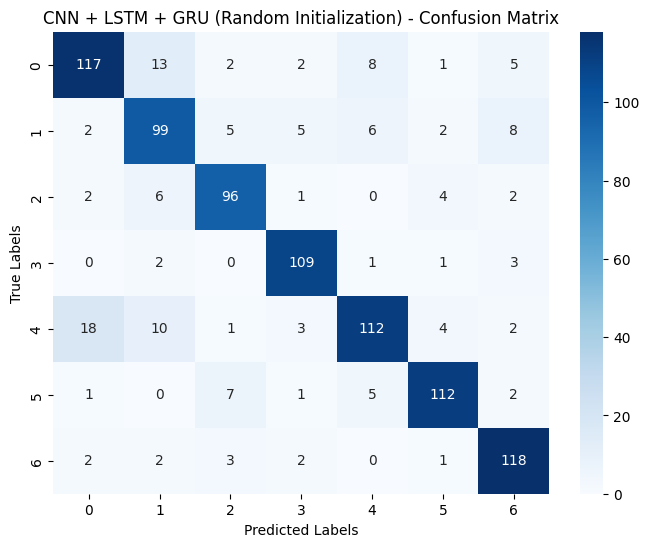

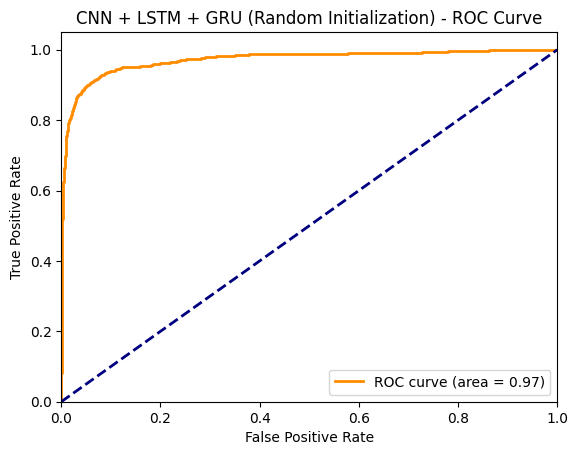

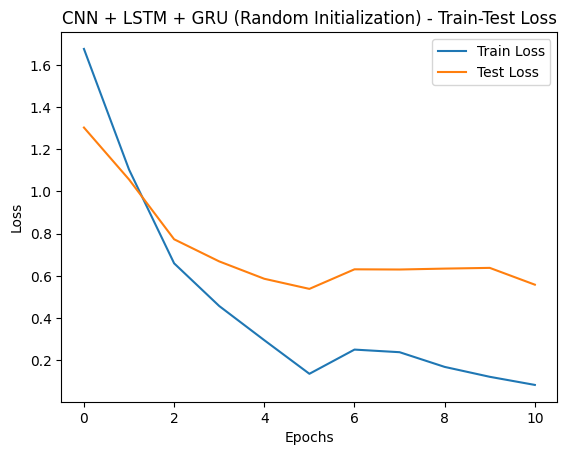

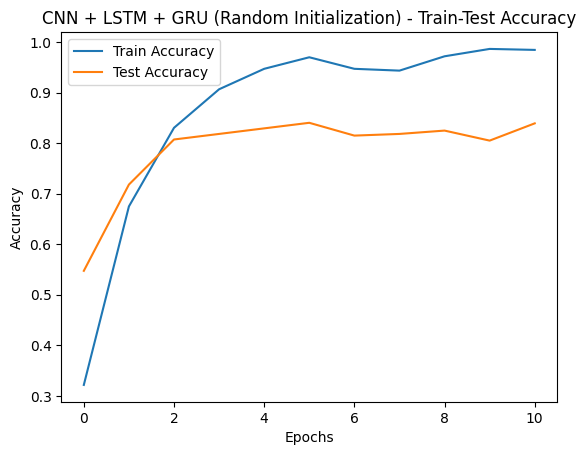

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Model 1: Random Initialization
def create_cnn_lstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               verbose=1)

# Modeli eğitme ve test etme
model_random = create_cnn_lstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=30, batch_size=64,
                                  validation_data=(X_test_pad, y_test_cat),
                                  callbacks=[early_stopping])  # Early stopping ekledik

# Modeli değerlendirme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1 sonuçlarını değerlendirelim
evaluate_model(model_random, history_random, "CNN + LSTM + GRU (Random Initialization)")


Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a69c41655c0>
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.3200 - loss: 1.7501 - val_accuracy: 0.5419 - val_loss: 1.4187
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.5165 - loss: 1.3849 - val_accuracy: 0.5683 - val_loss: 1.3611
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.5196 - loss: 1.3638 - val_accuracy: 0.6696 - val_loss: 1.1860
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.6239 - loss: 1.0882 - val_accuracy: 0.6960 - val_loss: 1.1018
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - accuracy: 0.6746 - loss: 1.1099 - val_accuracy: 0.6762 - val_loss: 1.1030
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.6725 - loss: 0.9836 - val_accuracy: 0.7115 - val_loss: 0.9477
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.7282 - loss: 0.8659 - val_accuracy: 0.7412 - val_loss: 0.8367
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.7597 - loss: 0.7309 - val_accuracy: 0.775

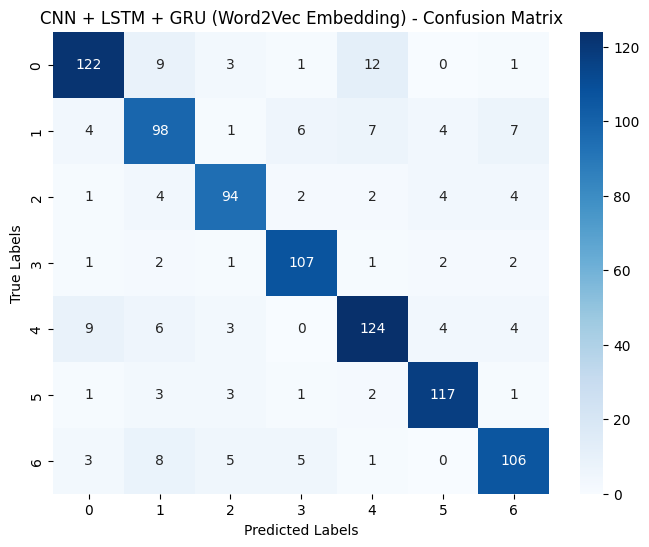

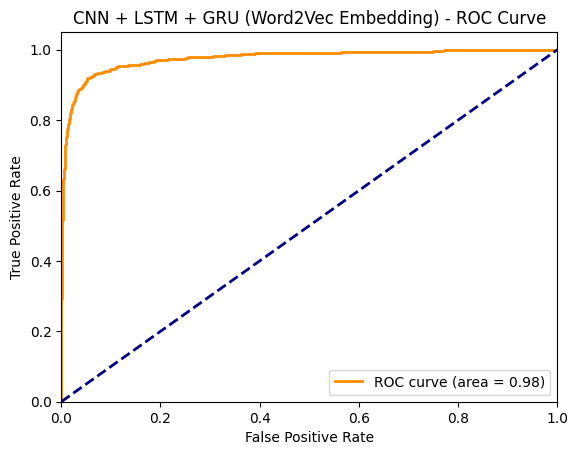

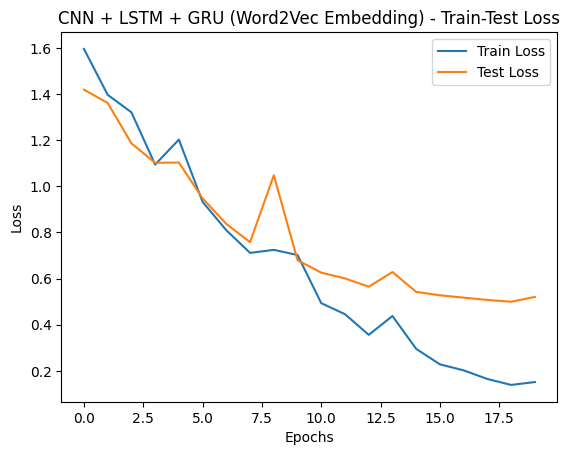

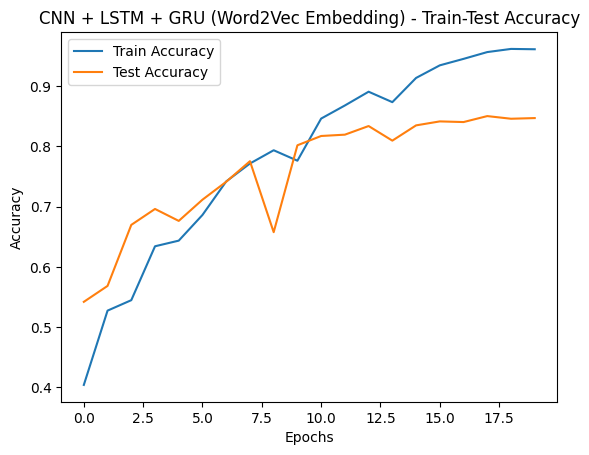

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 2: Word2Vec Embedding
def create_cnn_lstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True,
                               verbose=1)

# Modeli eğitme ve test etme
model_word2vec = create_cnn_lstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=20, batch_size=64,
                                      validation_data=(X_test_pad, y_test_cat),
                                      callbacks=[early_stopping])  # Early stopping ekledik

# Modeli değerlendirme fonksiyonu
evaluate_model(model_word2vec, history_word2vec, "CNN + LSTM + GRU (Word2Vec Embedding)")


In [ ]:
9

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a694b0b7500>
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 533ms/step - accuracy: 0.2033 - loss: 1.8794 - val_accuracy: 0.4967 - val_loss: 1.4677
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 357ms/step - accuracy: 0.5731 - loss: 1.2065 - val_accuracy: 0.6090 - val_loss: 1.1184
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 280ms/step - accuracy: 0.7385 - loss: 0.7587 - val_accuracy: 0.7544 - val_loss: 0.8564
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 315ms/step - accuracy: 0.8469 - loss: 0.5820 - val_accuracy: 0.6013 - val_loss: 1.1620
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 271ms/step - accuracy: 0.7865 - loss: 0.6919 - val_accuracy: 0.7203 - val_loss: 0.8793
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 299ms/step - accuracy: 0.8369 - loss: 0.4914 - val_accuracy: 0.7346 - val_loss: 0.8614
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 281ms/step - accuracy: 0.9166 - loss: 0.4171 - val_accuracy: 0.8150 - val_loss: 0.6637
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 346ms/step - accuracy: 0.9562 - loss: 0.3195 - val_accuracy: 0.826

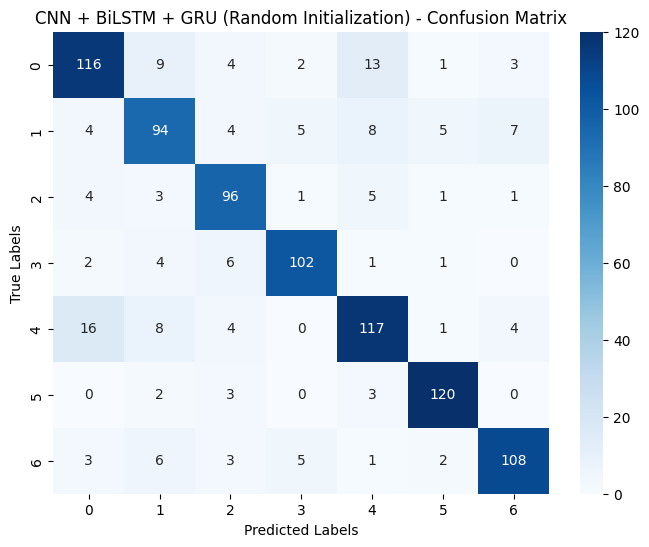

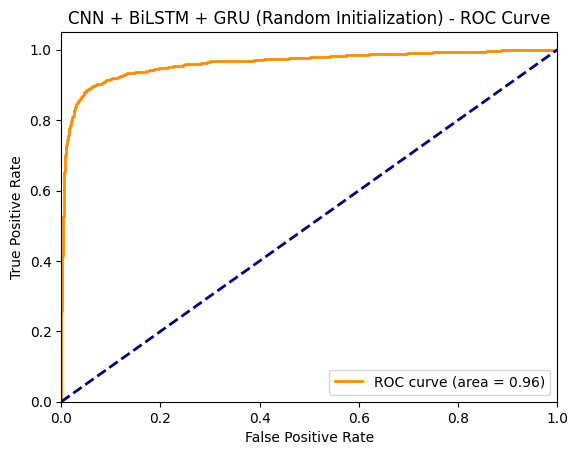

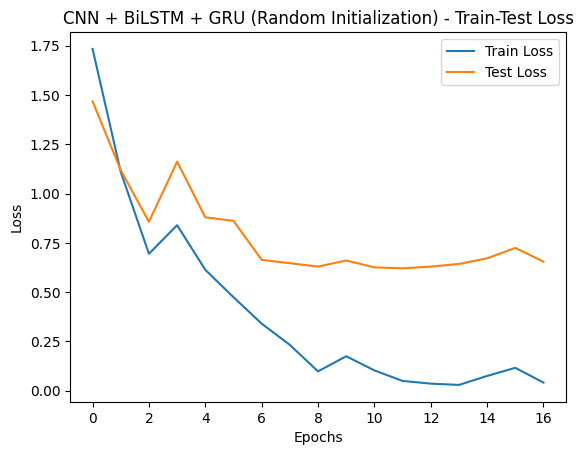

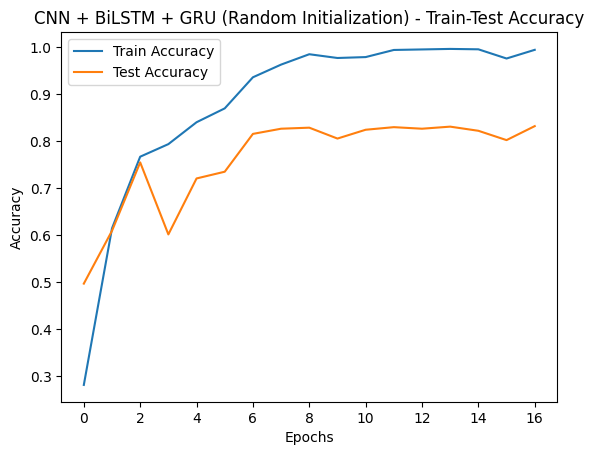

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Model 1: Random Initialization
def create_cnn_bilstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback'ini tanımlayalım
early_stopping = EarlyStopping(monitor='val_loss',  # validation loss'u izle
                               patience=5,  # 5 epoch boyunca gelişim olmadığında durdur
                               restore_best_weights=True,  # en iyi ağırlıkları geri yükle
                               verbose=1)

# Modeli eğitme ve test etme
model_random = create_cnn_bilstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=30, batch_size=64,
                                  validation_data=(X_test_pad, y_test_cat),
                                  callbacks=[early_stopping])  # Early stopping'i ekledik

# Modeli değerlendirme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1 sonuçlarını değerlendirelim
evaluate_model(model_random, history_random, "CNN + BiLSTM + GRU (Random Initialization)")


Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a69505dccc0>
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 280ms/step - accuracy: 0.3321 - loss: 1.7341 - val_accuracy: 0.5363 - val_loss: 1.4104
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.4790 - loss: 1.5179 - val_accuracy: 0.5551 - val_loss: 1.4446
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 270ms/step - accuracy: 0.5128 - loss: 1.3784 - val_accuracy: 0.5198 - val_loss: 1.4563
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 286ms/step - accuracy: 0.5206 - loss: 1.3330 - val_accuracy: 0.6685 - val_loss: 1.1307
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 266ms/step - accuracy: 0.6363 - loss: 1.0616 - val_accuracy: 0.6013 - val_loss: 1.1759
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - accuracy: 0.6395 - loss: 1.0037 - val_accuracy: 0.7170 - val_loss: 0.8755
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 387ms/step - accuracy: 0.7260 - loss: 0.8171 - val_accuracy: 0.7390 - val_loss: 0.7898
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 342ms/step - accuracy: 0.7835 - loss: 0.6579 - val_accuracy: 0.764

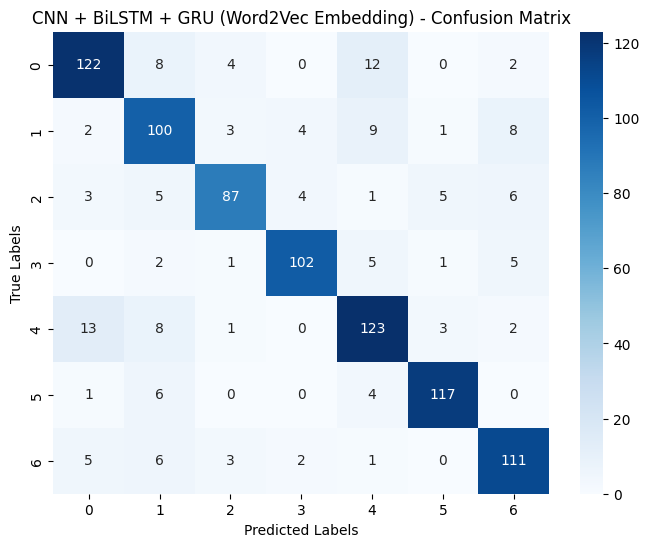

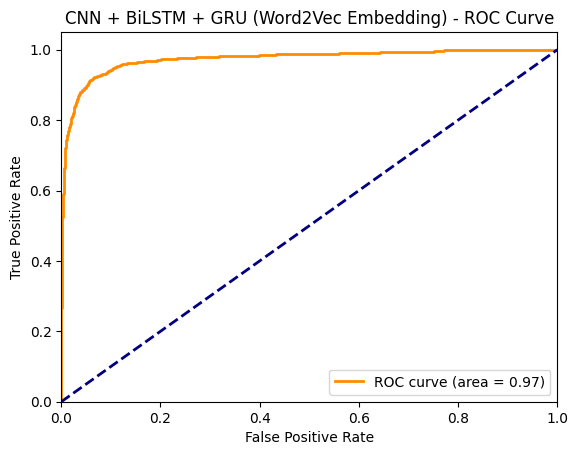

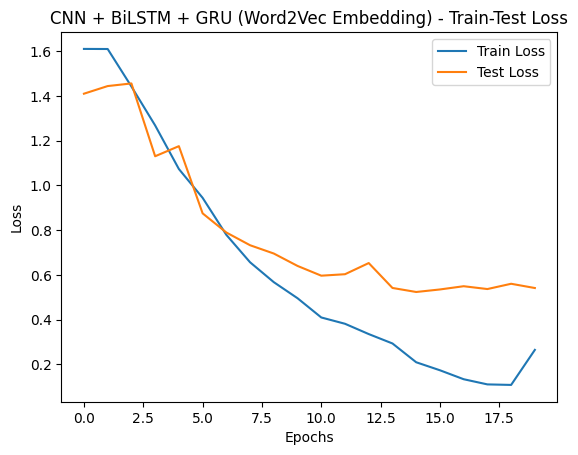

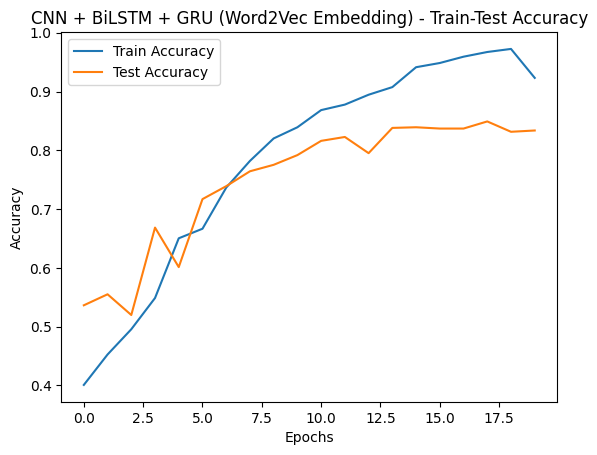

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 2: Word2Vec Embedding
def create_cnn_bilstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback'ini tanımlayalım
early_stopping = EarlyStopping(monitor='val_loss',  # validation loss'u izle
                               patience=5,  # 5 epoch boyunca gelişim olmadığında durdur
                               restore_best_weights=True,  # en iyi ağırlıkları geri yükle
                               verbose=1)

# Modeli eğitme ve test etme
model_word2vec = create_cnn_bilstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=30, batch_size=64, validation_data=(X_test_pad, y_test_cat), callbacks=[early_stopping])  # Early stopping'i ekledik

# Modeli değerlendirme fonksiyonu
evaluate_model(model_word2vec, history_word2vec, "CNN + BiLSTM + GRU (Word2Vec Embedding)")


In [ ]:
10

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7dadf95e14c0>
Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 760ms/step - accuracy: 0.2084 - loss: 6.2739 - val_accuracy: 0.5463 - val_loss: 1.7920
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 750ms/step - accuracy: 0.5331 - loss: 1.6499 - val_accuracy: 0.5771 - val_loss: 1.5697
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 739ms/step - accuracy: 0.6025 - loss: 69.6018 - val_accuracy: 0.4471 - val_loss: 1.5822
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 738ms/step - accuracy: 0.4916 - loss: 1.3983 - val_accuracy: 0.5881 - val_loss: 1.4664
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 81s 729ms/step - accuracy: 0.5990 - loss: 2.8372 - val_accuracy: 0.5958 - val_loss: 1.4273
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 730ms/step - accuracy: 0.6863 - loss: 1.1574 - val_accuracy: 0.6311 - val_loss: 1.3372
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 83s 735ms/step - accuracy: 0.7431 - loss: 1.0440 - val_accuracy: 0.6564 - val_loss: 1.2770
Epoch 8/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 81s 723ms/step - accuracy: 0.7721 - loss: 0.9331 - val_accuracy: 0.67

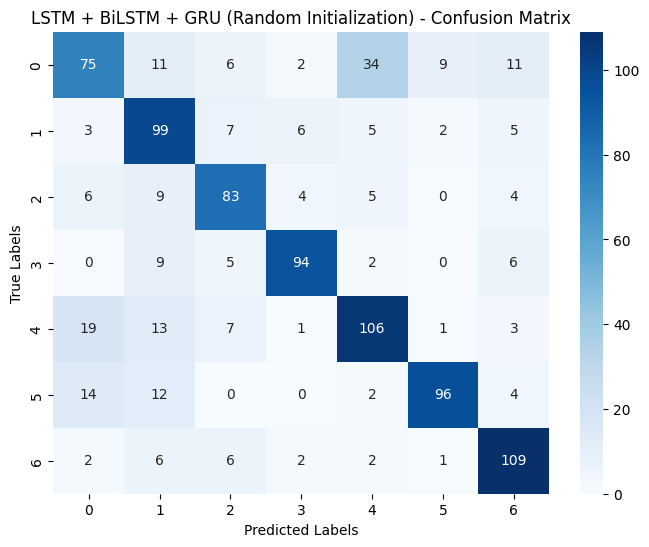

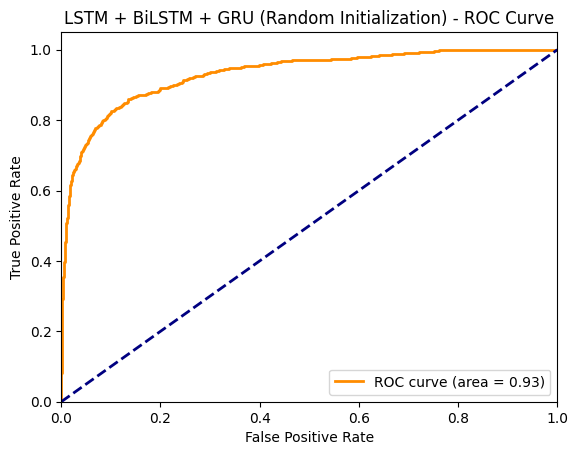

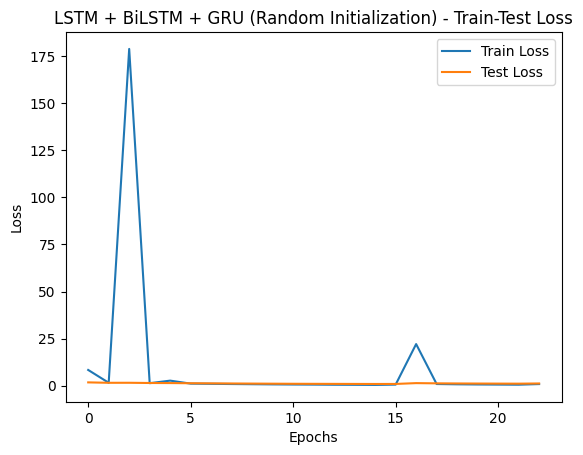

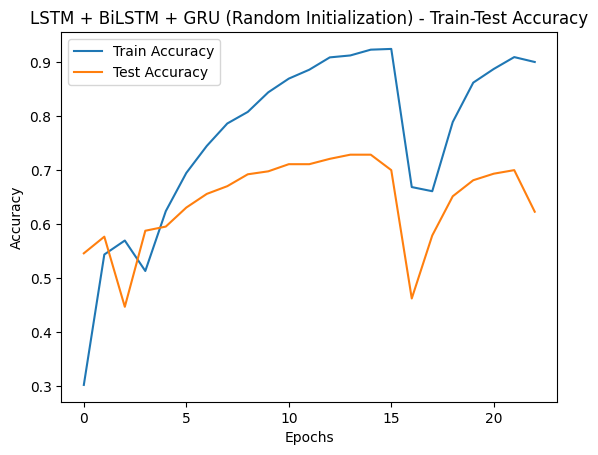

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 752ms/step - accuracy: 0.2913 - loss: 9.4891 - val_accuracy: 0.4350 - val_loss: 1.7153
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 744ms/step - accuracy: 0.3958 - loss: 1.6879 - val_accuracy: 0.5011 - val_loss: 1.6484
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 726ms/step - accuracy: 0.4114 - loss: 3.9480 - val_accuracy: 0.4229 - val_loss: 1.6699
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 731ms/step - accuracy: 0.4209 - loss: 1.6203 - val_accuracy: 0.5407 - val_loss: 1.6057
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 731ms/step - accuracy: 0.4849 - loss: 1.5485 - val_accuracy: 0.5628 - val_loss: 1.5489
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 83s 748ms/step - accuracy: 0.5217 - loss: 1.6257 - val_accuracy: 0.4251 - val_loss: 1.6521
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 81s 730ms/step - accuracy: 0.3376 - loss: 4.9844 - val_accuracy: 0.2907 - val_loss: 1.7752
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 83s 729ms/step - accuracy: 0.3487 - loss: 1.7014 - val_accuracy: 0.420

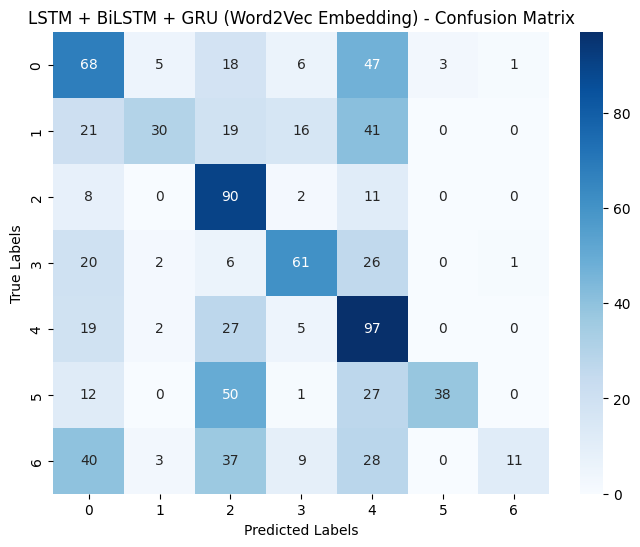

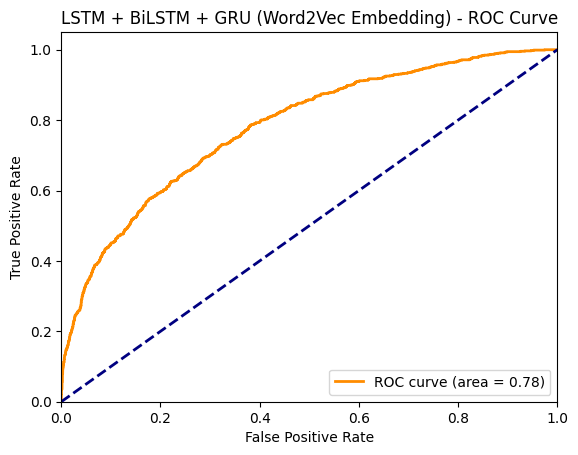

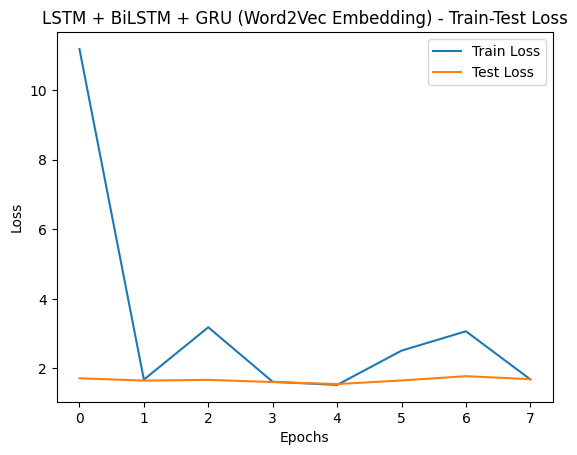

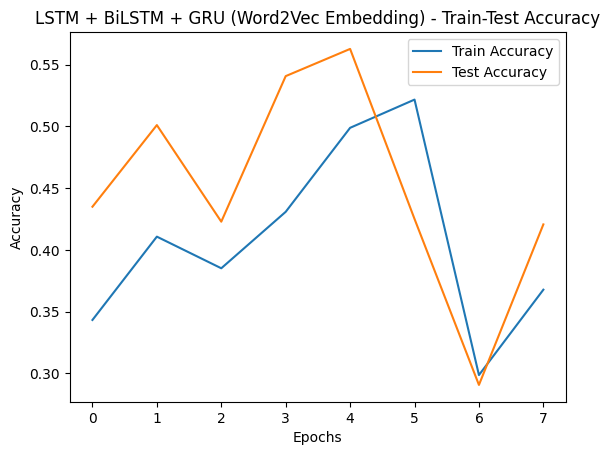

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_lstm_bilstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_lstm_bilstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=8,
                               restore_best_weights=True,
                               verbose=1)

# Model 1: Random Initialization
model_random = create_lstm_bilstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=40, batch_size=64,
                                  validation_data=(X_test_pad, y_test_cat),
                                  callbacks=[early_stopping])
evaluate_model(model_random, history_random, "LSTM + BiLSTM + GRU (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_lstm_bilstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=10, batch_size=64,
                                      validation_data=(X_test_pad, y_test_cat),
                                      callbacks=[early_stopping])
evaluate_model(model_word2vec, history_word2vec, "LSTM + BiLSTM + GRU (Word2Vec Embedding)")


Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0701104c0>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 49s 730ms/step - accuracy: 0.1988 - loss: 3.1124 - val_accuracy: 0.3855 - val_loss: 1.7578
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 81s 714ms/step - accuracy: 0.4326 - loss: 2.4484 - val_accuracy: 0.4824 - val_loss: 1.6167
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 716ms/step - accuracy: 0.5538 - loss: 2.1970 - val_accuracy: 0.4504 - val_loss: 1.6422
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 719ms/step - accuracy: 0.4482 - loss: 4.1413 - val_accuracy: 0.3216 - val_loss: 1.7495
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 715ms/step - accuracy: 0.4272 - loss: 1.5960 - val_accuracy: 0.4967 - val_loss: 1.6575
Training LSTM + BiLSTM + GRU (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step
LSTM + BiLSTM + GRU (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.51       148
           1       0.42      0.65      0.51       127
           2       0.37      0.88      0.

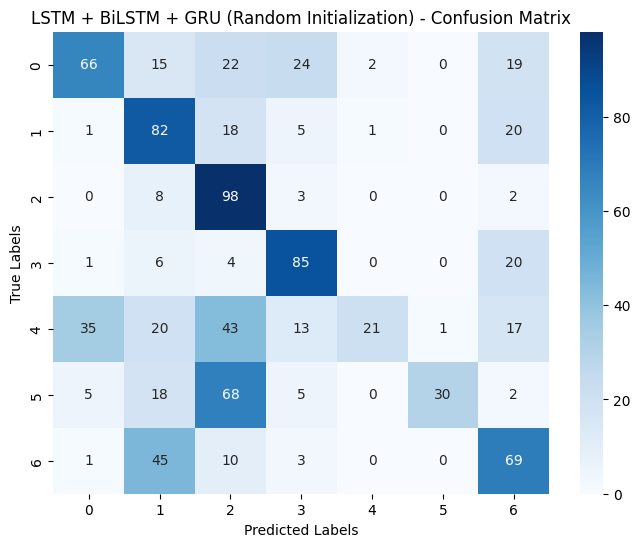

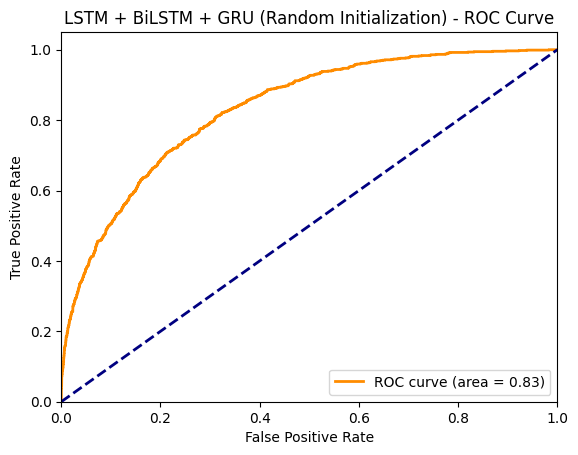

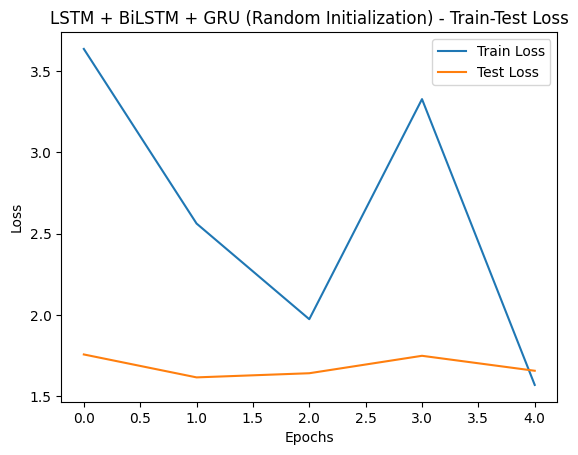

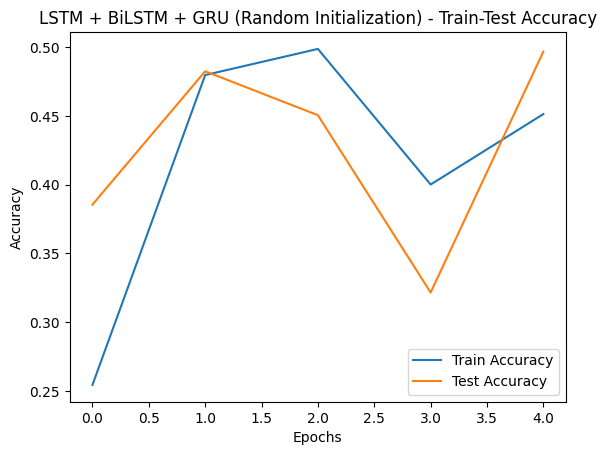

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 750ms/step - accuracy: 0.2864 - loss: 17.0274 - val_accuracy: 0.4130 - val_loss: 1.6827
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 718ms/step - accuracy: 0.4062 - loss: 1.6542 - val_accuracy: 0.4879 - val_loss: 1.6281
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 717ms/step - accuracy: 0.4637 - loss: 1.5939 - val_accuracy: 0.5231 - val_loss: 1.5680
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 721ms/step - accuracy: 0.4740 - loss: 1.5317 - val_accuracy: 0.5463 - val_loss: 1.5065
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 715ms/step - accuracy: 0.5163 - loss: 1.4394 - val_accuracy: 0.5661 - val_loss: 1.4373
Training LSTM + BiLSTM + GRU (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step
LSTM + BiLSTM + GRU (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       148
           1       0.50      0.60      0.54       127
           2       0.54      0.60      0.57   

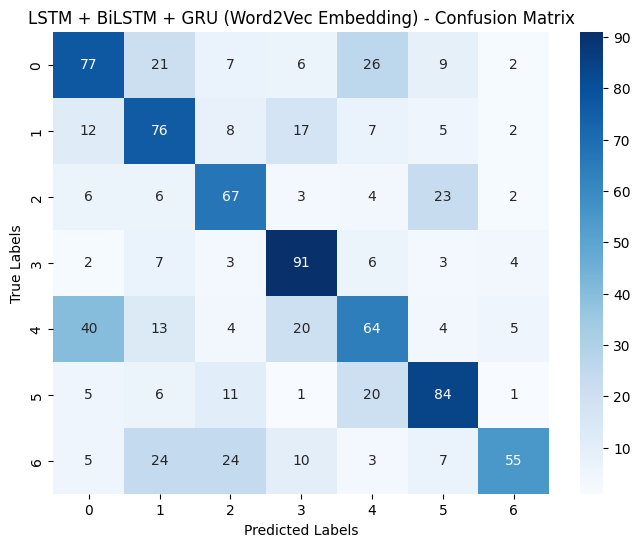

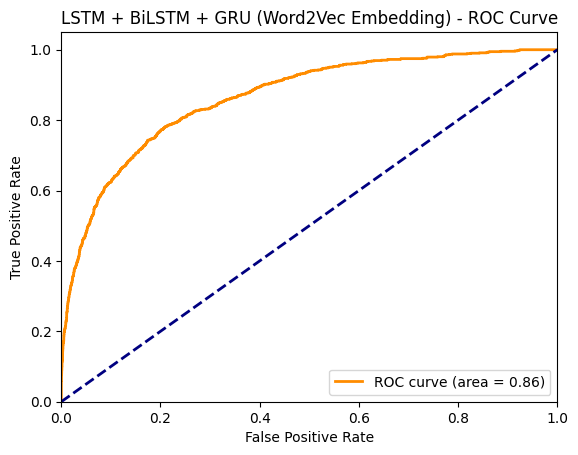

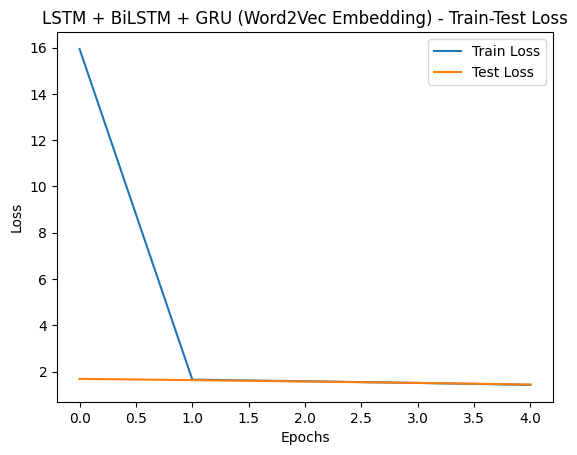

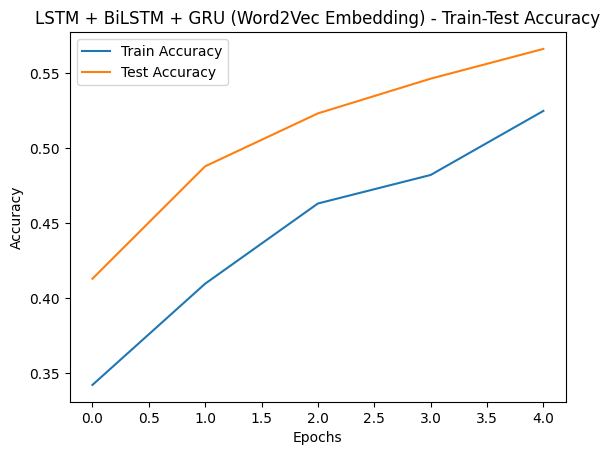

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_lstm_bilstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_lstm_bilstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_lstm_bilstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "LSTM + BiLSTM + GRU (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_lstm_bilstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "LSTM + BiLSTM + GRU (Word2Vec Embedding)")


In [ ]:
11

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a696828d480>
Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 390ms/step - accuracy: 0.2126 - loss: 1.8700 - val_accuracy: 0.3866 - val_loss: 1.5178
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 506ms/step - accuracy: 0.5585 - loss: 1.2688 - val_accuracy: 0.6740 - val_loss: 1.0979
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 35s 405ms/step - accuracy: 0.7144 - loss: 0.8766 - val_accuracy: 0.7786 - val_loss: 0.8695
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 38s 347ms/step - accuracy: 0.8534 - loss: 0.5379 - val_accuracy: 0.7225 - val_loss: 0.9219
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 331ms/step - accuracy: 0.8756 - loss: 0.5023 - val_accuracy: 0.8183 - val_loss: 0.6633
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 354ms/step - accuracy: 0.9556 - loss: 0.2128 - val_accuracy: 0.8128 - val_loss: 0.6445
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 335ms/step - accuracy: 0.9617 - loss: 0.1627 - val_accuracy: 0.8150 - val_loss: 0.6133
Epoch 8/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 360ms/step - accuracy: 0.9696 - loss: 0.1310 - val_accuracy: 0.805

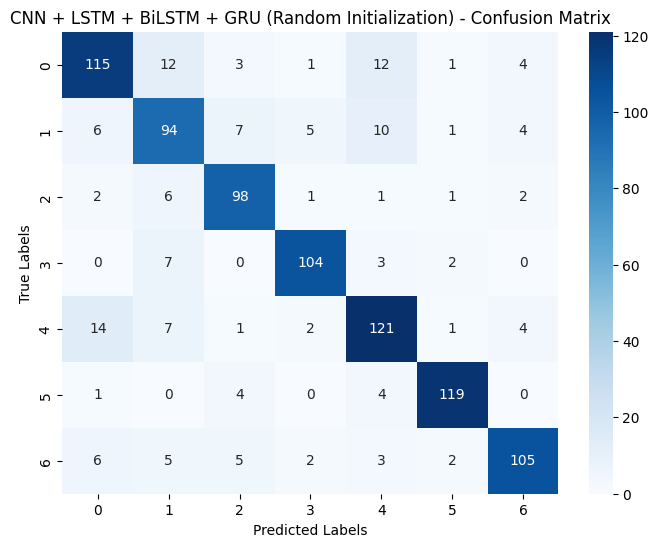

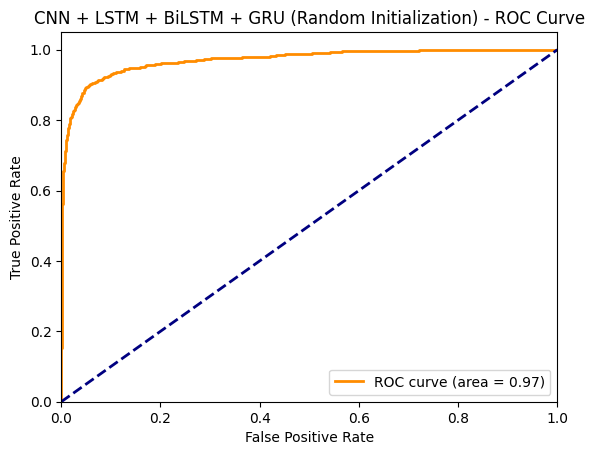

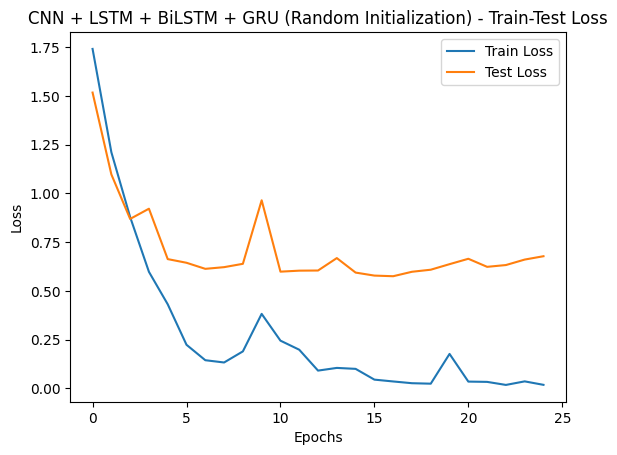

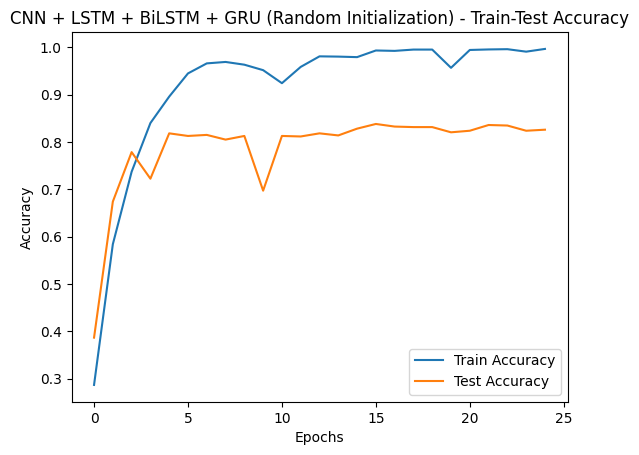

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_cnn_lstm_bilstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=8,
                               restore_best_weights=True,
                               verbose=1)

# Modeli eğitme ve test etme
model_random = create_cnn_lstm_bilstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=40, batch_size=64,
                                  validation_data=(X_test_pad, y_test_cat),
                                  callbacks=[early_stopping])

# Modeli değerlendirme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1 sonuçlarını değerlendirelim
evaluate_model(model_random, history_random, "CNN + LSTM + BiLSTM + GRU (Random Initialization)")


Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a6952addec0>


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 370ms/step - accuracy: 0.2814 - loss: 1.7983 - val_accuracy: 0.5595 - val_loss: 1.3353
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.4902 - loss: 1.4509 - val_accuracy: 0.5892 - val_loss: 1.2841
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.5456 - loss: 1.2013 - val_accuracy: 0.6575 - val_loss: 1.1197
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 333ms/step - accuracy: 0.6008 - loss: 1.1047 - val_accuracy: 0.6828 - val_loss: 1.0202
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 362ms/step - accuracy: 0.6722 - loss: 0.9453 - val_accuracy: 0.7236 - val_loss: 0.8647
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 362ms/step - accuracy: 0.7280 - loss: 0.7816 - val_accuracy: 0.7412 - val_loss: 0.7982
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 331ms/step - accuracy: 0.7694 - loss: 0.6742 - val_accuracy: 0.7588 - val_loss: 0.7710
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 361ms/step - accuracy: 0.8021 - loss: 0.6126 - val_accu

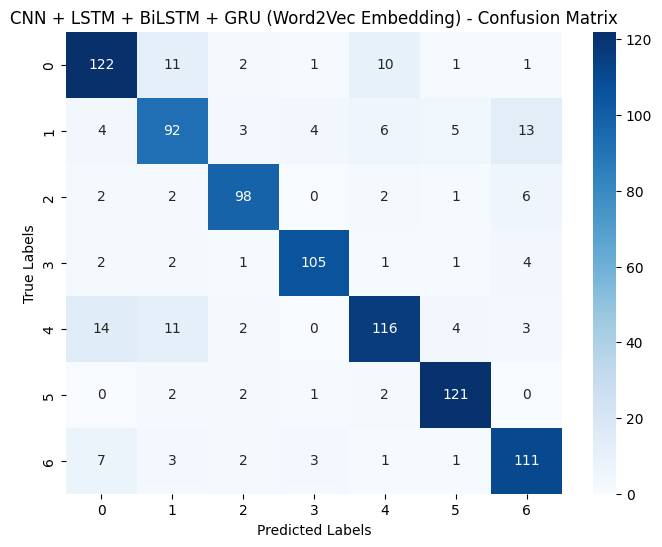

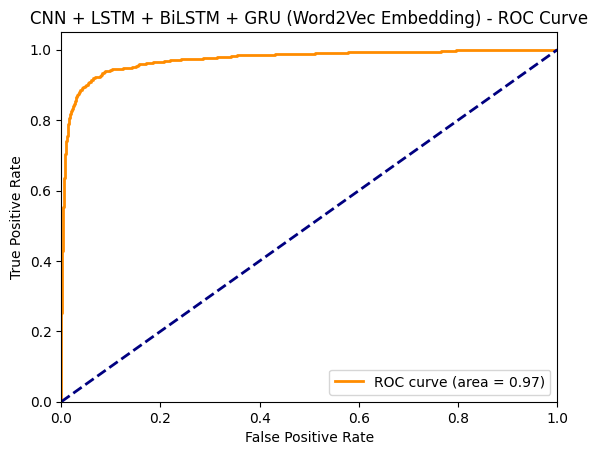

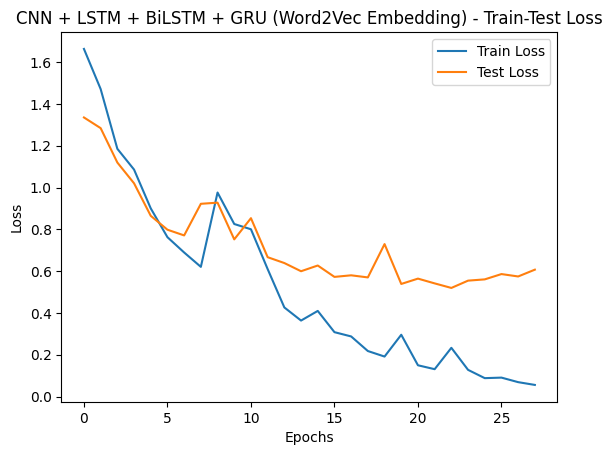

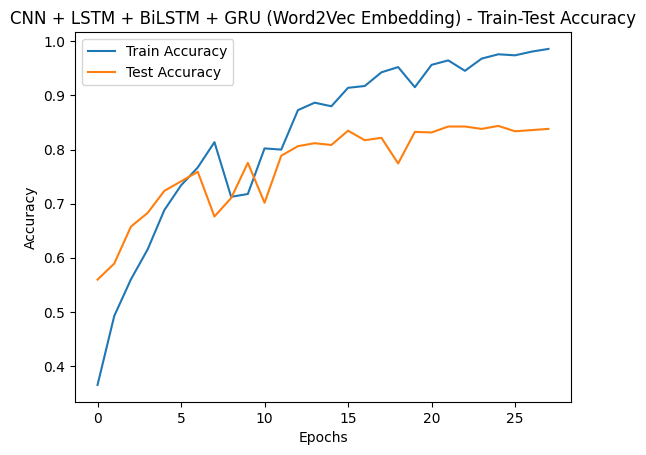

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 2: Word2Vec Embedding
def create_cnn_lstm_bilstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               verbose=1)

# Modeli eğitme ve test etme
model_word2vec = create_cnn_lstm_bilstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=30, batch_size=64,
                                      validation_data=(X_test_pad, y_test_cat),
                                      callbacks=[early_stopping])  # Early stopping'i ekledik

# Modeli değerlendirme fonksiyonu
evaluate_model(model_word2vec, history_word2vec, "CNN + LSTM + BiLSTM + GRU (Word2Vec Embedding)")
